In [1]:
# ÁõÆÁöÑ: ÊâπÈáèÊ∫ñÂÇôË®ìÁ∑¥ÈõÜÔºå18È°ÜÂ§ßËÖ¶‰ΩøÁî® [ÁÑ°Á∏ÆÊîæ ] Ëº∏Âá∫Â≠òÊ™îÔºå‰∏¶‰ΩøÁî®ÊªëÂãïÂàáÂâ≤ÊàêÊõ¥Â§öÊï∏ÊìöÂêà‰Ωµ„ÄÇ
# ÊªëÂãïÊ≠•Êï∏Êîπ20„ÄÅÈ†êËôïÁêÜÊîπ: ÁÑ°Á∏ÆÊîæ-128ËÉΩË¢´20Êï¥Èô§„ÄÅÁÑ°Á∏ÆÊîæ-64ËÉΩË¢´20Êï¥Èô§
# ÁõÆÁöÑ: ÈÄèÈÅéÊãìÂ±ïÁöÑÁ©∫ÁôΩÁï´Â∏ÉÁöÑÊñπÂºèÂéªÁ∂≠ÊåÅÂéüÂßãÊ¢ØÂ∫¶ÔºåÊúÄÁµÇ‰æùËàä‰ΩøÁî® (64,128,128) Ë®ìÁ∑¥Ê®°Âûã„ÄÇ
# ==========================
# Ëº∏Âá∫: 1. 18È°ÜÂêÑÂ∑¶Âè≥ÁöÑ3DÂΩ±ÂÉè 2. ÊªëÂãïÂàáÂâ≤ÂÖ®ÈÉ®ËÖ¶ÂçÄÔºå‰∏¶Ëº∏Âá∫ 3. Âêà‰Ωµ10È°ÜÂ§ßËÖ¶Áï∂‰ΩúË®ìÁ∑¥ÈõÜ 4. Âêà‰Ωµ2È°ÜÂ§ßËÖ¶‰ΩúÁÇ∫Ê∏¨Ë©¶ÈõÜ
# ÊúÄÁµÇËº∏Âá∫ÁöÑÂèØ‰ª•Áõ¥Êé•Áµ¶Ê®°ÂûãË®ìÁ∑¥‰ΩøÁî®„ÄÇ

In [2]:
# 2023/05/02 Ë©≥Á¥∞Ê≠•È©ü
# Ë®ìÁ∑¥ÈõÜÊ∫ñÂÇô:
# 1. ÊâπÈáèÊ∫ñÂÇôÊØèÈ°ÜÂ§ßËÖ¶ÁöÑÂ∑¶Âè≥ËÖ¶(Â∑≤ÈÄèÈÅéYOLOÂàáÂâ≤Ôºå‰∏¶‰∏îÁ∏ÆÊîæËá≥168x168) *ÂÖàËº∏Âá∫ÂÑ≤Â≠ò (Ê™îÂêçÁ¥ÄÈåÑÂéüÂßãÂ∞∫ÂØ∏)
# ÊÆµËêΩ: ËÆÄÂèñÊØèÈ°ÜËÖ¶Â∑≤ÂàáÂâ≤ÁöÑ3DËÖ¶ÂçÄ(ÂàÜÂà•ËÆÄÂèñÊàêË®ìÁ∑¥ÈõÜ„ÄÅÊ∏¨Ë©¶ÈõÜ)
# 2. ÂÖàÂ∞áÊØè‰∏ÄÂÄã3DËÖ¶ÂçÄÊãìÂ±ïÊàêÂèØ‰ª•ÂåπÈÖçÊªëÂãïÂàáÂâ≤ÁöÑÂ∞∫ÂØ∏
# 3. ÊØèÁµÑ3DËÖ¶ÂçÄÈÉΩÈúÄÊ∫ñÂÇôZËª∏ÈõôÂêëdata(ÂÉÖÂ∞çË®ìÁ∑¥ÈõÜ)
# 4. ÊªëÂãïÂàáÂâ≤: 20Ê≠•„ÄÇcubeÂ∞∫ÂØ∏: 64,128,128 (ÂàÜÂà•Â∞çË®ìÁ∑¥ÈõÜ„ÄÅÊ∏¨Ë©¶ÈõÜ)ÔºåÂêà‰ΩµÂæåËº∏Âá∫

In [3]:
# 2023/08/09 CALÂíåMBÂÖ±Áî®

In [4]:
# ===============Ê≠£Âºè‰ª£Á¢º===============

In [5]:
# Step0 Â∞éÂÖ•Â•ó‰ª∂
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import tifffile as tif
import time, timeit
from patchify import patchify, unpatchify
import gc  # ÂºïÂÖ•ÂûÉÂúæÂõûÊî∂Ê®°ÁµÑ
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import shutil
%matplotlib inline
# Ë≥áÊñô‰æÜÊ∫êË≥áÊñôÂ§æ
# 18È°ÜÂ§ßËÖ¶ÁöÑDLG&Label ÈÉΩÂú® DLG_18Brains_DatasetÔºå‰ª•tif„ÄÅtiffÊ†ºÂºè‰øùÂ≠ò

In [6]:
# Step1_0 ÂÖàË®≠ÂÆöÈÄôÊ¨°Ë¶ÅÂàáÂâ≤ÁöÑÂ§ßËÖ¶ËÖ¶ÂçÄÔºåÂæåÁ∫åÊúÉÁî®Âà∞"_MB.ome" Êú´Ê™îÊ°àÂêçÁ®±
seg_target = 'CAL'

In [7]:
# Step0_1
# Âæû 2023_Ê≠£ÂºèÁâà_ÊöëÂÅáÂ∑•ËÆÄÁ≥ªÂàóÂ∞àÁî®/ÂÆåÊàêÂØ©Ê†∏/AL/ Ë≥áÊñôÂ§æË§áË£Ω ‰ª•ÂÆåÊàêÁöÑtiffÊ™îÊ°àËá≥ DLG_18Brains_Dataset
# Â∑≤ÂÆåÊàêÂØ©Ê†∏Ë∑ØÂæë = 2023_Ê≠£ÂºèÁâà_ÊöëÂÅáÂ∑•ËÆÄÁ≥ªÂàóÂ∞àÁî®/ÂÆåÊàêÂØ©Ê†∏/AL/
FinishedPath = '2023_Ê≠£ÂºèÁâà_ÊöëÂÅáÂ∑•ËÆÄÁ≥ªÂàóÂ∞àÁî®/ÂÆåÊàêÂØ©Ê†∏/'+seg_target+'/'
# ËÆÄÂèñÂ∑≤ÂÆåÊàêÂØ©Ê†∏Ë∑ØÂæëÂÖßÁöÑÊâÄÊúâÊ™îÊ°à
FinishedFiles = os.listdir(FinishedPath)
# Ë§áË£ΩËá≥Ë∑ØÂæë = DLG_18Brains_Dataset/
CopyToPath = 'DLG_18Brains_Dataset/'
# ËÆÄÂèñCopyToPathÂÖßÁöÑÊâÄÊúâÊ™îÊ°à
CopyToFiles = os.listdir(CopyToPath)
# ‰ΩøÁî®Ëø¥ÂúàÂ∞áÊâÄÊúâÊ™îÊ°àË§áË£ΩËá≥ DLG_18Brains_Dataset/ ÔºåÈúÄÁ¢∫Ë™ç DLG_18Brains_Dataset/ ÂÖßÁöÑÊ™îÊ°àÊòØÂê¶Â∑≤Â≠òÂú®
for i in range(len(FinishedFiles)):
    if FinishedFiles[i] not in CopyToFiles:
        shutil.copyfile(FinishedPath + FinishedFiles[i], CopyToPath + FinishedFiles[i])
        print(FinishedFiles[i] + ' _Êú¨Ê¨°Ë§áË£ΩÂÆåÊàê')
    else:
        print(FinishedFiles[i] + ' _Â∑≤Â≠òÂú®')

Cha-F-300158_CAL.ome.tiff _Â∑≤Â≠òÂú®
5-HT1B-M-000008_CAL.ome.tiff _Â∑≤Â≠òÂú®
fru-F-500439_CAL.ome.tiff _Â∑≤Â≠òÂú®
VGlut-F-700029_CAL.ome.tiff _Â∑≤Â≠òÂú®
Gad1-F-400041_CAL.ome.tiff _Â∑≤Â≠òÂú®
Gad1-F-200344_CAL.ome.tiff _Â∑≤Â≠òÂú®
npf-M-300037_CAL.ome.tiff _Â∑≤Â≠òÂú®
Trh-F-700013_CAL.ome.tiff _Â∑≤Â≠òÂú®
Trh-F-200069_CAL.ome.tiff _Â∑≤Â≠òÂú®
5HT1A-M-000005_CAL.ome.tiff _Â∑≤Â≠òÂú®
TH-F-100083_CAL.ome.tiff _Â∑≤Â≠òÂú®
GH146-M-400001_CAL.ome.tiff _Â∑≤Â≠òÂú®
Gad1-F-400314_CAL.ome.tiff _Â∑≤Â≠òÂú®
VGlut-F-800014_CAL.ome.tiff _Â∑≤Â≠òÂú®
G0239-F-000005_CAL.ome.tiff _Â∑≤Â≠òÂú®
E0585-F-200015_CAL.ome.tiff _Â∑≤Â≠òÂú®
G0239-F-000010_CAL.ome.tiff _Â∑≤Â≠òÂú®
Gad1-F-700093_CAL.ome.tiff _Â∑≤Â≠òÂú®


DLG_shape:  (121, 1024, 1024)
Label_shape:  (121, 1024, 1024)


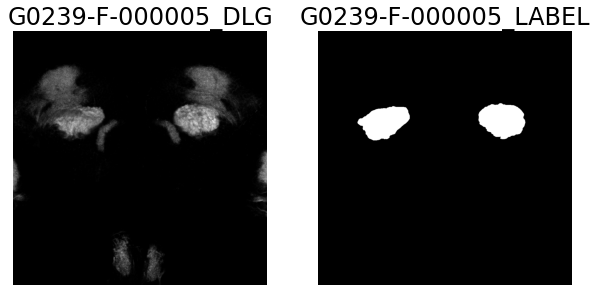

In [8]:
# Step1_1 ËÆÄÂèñ G0239-F-000005 =============Ê∏¨Ë©¶ËÆÄÂèñ‰∏¶È°ØÁ§∫ÂúñÁâá>>>ÂèØÁôºÁèæ G0239-F-000005 ÁöÑZËª∏ÊñπÂêëÊòØÂæû[ ÂæåÂæÄÂâç ]
# ÂÖàËÆÄÂèñDLG
DLG = tif.imread(r'DLG_18Brains_Dataset/G0239-F-000005.tif')
print('DLG_shape: ',DLG.shape)
# ËÆÄÂèñLABEL
Label = tif.imread(r'DLG_18Brains_Dataset/G0239-F-000005_'+seg_target+'.ome.tiff')
print('Label_shape: ',Label.shape)
Label[Label>0] =1
Z_num = 100
plt.figure(figsize=(10, 20))
#ÁõÆÊ®ôÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
ax = plt.subplot(1, 2, 1)
plt.imshow(DLG[Z_num],cmap = 'PuBu')
ax.set_title("G0239-F-000005_DLG",fontsize=24)
plt.axis('off')
plt.gray()
#ÂåπÈÖçÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
ax = plt.subplot(1, 2, 2)
plt.imshow(Label[Z_num],cmap = 'PuBu')
ax.set_title("G0239-F-000005_LABEL",fontsize=24)
plt.axis('off')
plt.gray()

DLG_shape:  (122, 1024, 1024)
Label_shape:  (122, 1024, 1024)


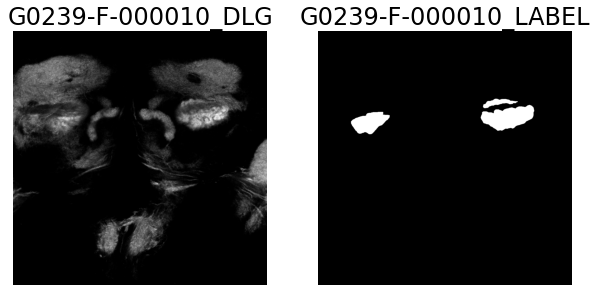

In [9]:
# Step1_2 ËÆÄÂèñ G0239-F-000010 =============Ê∏¨Ë©¶ËÆÄÂèñ‰∏¶È°ØÁ§∫ÂúñÁâá>>>ÂèØÁôºÁèæ G0239-F-000010 ÁöÑZËª∏ÊñπÂêëÊòØÂæû[ ÂæåÂæÄÂâç ]
import tifffile as tif
# ÂÖàËÆÄÂèñDLG
DLG = tif.imread(r'DLG_18Brains_Dataset/G0239-F-000010.tif')
print('DLG_shape: ',DLG.shape)
# ËÆÄÂèñLABEL
Label = tif.imread(r'DLG_18Brains_Dataset/G0239-F-000010_'+seg_target+'.ome.tiff')
print('Label_shape: ',Label.shape)
Label[Label>0] =1
Z_num = 100
plt.figure(figsize=(10, 20))
#ÁõÆÊ®ôÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
ax = plt.subplot(1, 2, 1)
plt.imshow(DLG[Z_num],cmap = 'PuBu')
ax.set_title("G0239-F-000010_DLG",fontsize=24)
plt.axis('off')
plt.gray()
#ÂåπÈÖçÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
ax = plt.subplot(1, 2, 2)
plt.imshow(Label[Z_num],cmap = 'PuBu')
ax.set_title("G0239-F-000010_LABEL",fontsize=24)
plt.axis('off')
plt.gray()

In [10]:
# ===============Á¨¨‰∏ÄÊ≠•ÈöéÊÆµ: Ê∫ñÂÇô2DÂúñÁâáÁµ¶YOLOÈÄ≤Ë°åËÖ¶ÂçÄÁØÑÂúçÂà§Êñ∑===============
# ===============Ëº∏Âá∫2DÊäïÂΩ±Âúñ(ÂÖ±18Âºµ) Ëá≥ waiting_for_inferË≥áÊñôÂ§æ===============

In [11]:
# Step2 (Á≤æÁ∞°Áâà) Â∞áË®ìÁ∑¥ÈõÜÊâÄÈúÄÁöÑ18ÂÄãÂ§ßËÖ¶Â£ìÊàêXYÂúñÔºå‰∏ã‰∏ÄÊ≠•Êèê‰æõÁµ¶YOLOv7
# ËÆÄÂèñ DLG_18Brains_Dataset Ë≥áÊñôÂ§æÂÖßÁöÑDLG tifÊ™îÊ°à
Brain_18_tif_dir = 'DLG_18Brains_Dataset/'
# ÂàóÂá∫ÊâÄÊúâYOLOÊé®ÁêÜËº∏Âá∫ÁöÑÂúñÁâáÔºåÂè™ÂàóÂá∫ÂâØÊ™îÂêçÁÇ∫pngÁöÑÂúñÁâá
Brain_18 = [f[:-4] for f in os.listdir(Brain_18_tif_dir) if f.endswith('.tif')]
print('18-Brains Á∏ΩÂÖ±Êï∏Èáè: ',len(Brain_18))
# Brain_18 ÊòØ18È°ÜÂ§ßËÖ¶ÁöÑÂêçÁ®±
# ËÆÄÂèñ ÂÖ®ÈÉ®DLG npyÁöÑÊ™îÊ°à Ë≥áÊñôÂ§æË∑ØÂæë: "/mnt/nas_1/LoLab/kaiyi_hsu/Ouput_from_Amira/npy_files/"
nii_gz_src = "/mnt/nas_1/LoLab/kaiyi_hsu/Ouput_from_Amira/npy_files/"
All_brain_files = os.listdir(nii_gz_src)
print('ALL-Brains Á∏ΩÂÖ±Êï∏Èáè: ',len(All_brain_files))
# All_brain_files ÊòØ 28573È°ÜÂ§ßËÖ¶ÁöÑÊ™îÊ°àÂêçÁ®±
# Ë¶ÅÂÖàÊ∏ÖÁ©∫ waiting_for_infer Ë≥áÊñôÂ§æÔºåÊâç‰∏çÊúÉË¢´ÂÖàÂâçÁöÑÊ™îÊ°àÂΩ±Èüø
!rm -r waiting_for_infer
!mkdir waiting_for_infer
# ÊâπÈáèËÆÄÂèñnpyÊ™îÊ°àÔºå‰∏¶Âú®Ëø¥Âúà‰∏≠ÈÄ≤Ë°åËº∏Âá∫ÂúñÁâá Ëá≥ output_image_path Ë≥áÊñôÂ§æ
output_image_path = "waiting_for_infer/"
for i in range(len(Brain_18)):
    print('Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶: ',Brain_18[i])
    NPY = np.load(nii_gz_src+Brain_18[i]+'.npy')
    # ÈúÄË¶ÅÁΩÆÊèõÂÖ©Ê¨°
    NPY = np.transpose(NPY, (1, 0, 2))
    NPY = np.transpose(NPY, (2, 0, 1))
    # ÊäïÂΩ±Êàê2D
    projection = np.sum(NPY, axis=0) # ÂèñÂä†Á∏ΩÂÄº
    # Â∞áprojectionËº∏Âá∫ÊàêÂúñÁâá(png)Ôºå‰∏¶Â≠òËá≥output_image_path
    plt.imsave(output_image_path+Brain_18[i]+'.png', projection, cmap='gray')
#     # ========
#     # ‰ΩúÂúñÂ±ïÁ§∫ÂéüÂúñ
#     Z_num = 70
#     plt.figure(figsize=(10, 10))
#     ax = plt.subplot(1, 1, 1)
#     plt.imshow(NPY[Z_num],cmap = 'PuBu')
#     ax.set_title(Brain_18[i],fontsize=24)
#     plt.axis('off')
#     plt.gray()
#     # ========
#     # ‰ΩúÂúñÂ±ïÁ§∫ÊäïÂΩ±2DÂúñ
#     plt.figure(figsize=(10, 10))
#     ax = plt.subplot(1, 1, 1)
#     plt.imshow(projection,cmap = 'PuBu')
#     ax.set_title(Brain_18[i]+'_to_2D',fontsize=24)
#     plt.axis('off')
#     plt.gray()
#     plt.show()

18-Brains Á∏ΩÂÖ±Êï∏Èáè:  18
ALL-Brains Á∏ΩÂÖ±Êï∏Èáè:  28573
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  Cha-F-300158
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  5-HT1B-M-000008
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  5HT1A-M-000005
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  npf-M-300037
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  Trh-F-700013
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  G0239-F-000010
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  VGlut-F-700029
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  G0239-F-000005
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  Gad1-F-200344
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  E0585-F-200015
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  Gad1-F-700093
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  GH146-M-400001
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  Trh-F-200069
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  VGlut-F-800014
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  Gad1-F-400314
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  fru-F-500439
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  TH-F-100083
Áï∂ÂâçËôïÁêÜÂ§ßËÖ¶:  Gad1-F-400041


# ËàäÁâà Step2 ÁõÆÁöÑ: Â∞á18È°ÜÂ§ßËÖ¶ÊäïÂΩ±ÊàêXYÈù¢
# Step2 Â∞áË®ìÁ∑¥ÈõÜÊâÄÈúÄÁöÑÂ§ßËÖ¶Â£ìÊàêXYÂúñÔºåÂõ†ÁÇ∫ÈúÄË¶ÅÊé®ÁêÜMBÁöÑÈÇäÁïåÊ°Ü(YOLOv7) =================Â∑≤Á∂ìÂü∑Ë°åÈÅéÔºåÂèØ‰ª•ÁÑ°ÈúÄÂÜçÂü∑Ë°å‰∏ÄÊ¨°!
# Âè™Áî®18È°ÜÂ§ßËÖ¶Ôºå‰∏çË¶Å‰ΩøÁî®Ê®ôÊ∫ñËÖ¶
# ËÆÄÂèñÊâÄÊúâDLG npyÁöÑÊ™îÊ°àÂêçÁ®±
nii_gz_src = "/mnt/nas_1/LoLab/kaiyi_hsu/Ouput_from_Amira/npy_files/"
src_files = os.listdir(nii_gz_src)
# ÊâπÈáèÂ∞á18ÂÄãÂ§ßËÖ¶ÈÉΩÊäïÂΩ±Êàê18Âºµ2DÂúñ
Brain_18 = ['5HT1A-M-000005','5-HT1B-M-000008','Cha-F-300158','E0585-F-200015','fru-F-500439','G0239-F-000005','G0239-F-000010','Gad1-F-200344','Gad1-F-400041','Gad1-F-400314','Gad1-F-700093','GH146-M-400001','npf-M-300037','TH-F-100083','Trh-F-200069','Trh-F-700013','VGlut-F-700029','VGlut-F-800014']
#ÈñãÂßãÈÄ≤Ë°åÂ∞á‰ΩéËß£ÊûêÂ∫¶‰∏âÁ∂≠Áü©Èô£3DÂúñÂΩ¢ËΩâ2DÂúñÂΩ¢Ôºà‰∫åÁ∂≠Áü©Èô£Ôºâ(XYÊà™Èù¢)
import time, timeit
def _test_faster_3D_to_2D(NumOfFiles,target_array):
    New_one_Dimension_List = target_array
    New_X=New_one_Dimension_List[NumOfFiles].shape[0]
    New_Y=New_one_Dimension_List[NumOfFiles].shape[1]
    New_Z=New_one_Dimension_List[NumOfFiles].shape[2]
    for ii in range(1):
        #Â∞áÊ®ôÊ∫ñÂåñÂæåÁöÑ‰∏ÄÁ∂≠Áü©Èô£ËΩâÊèõÂõû‰∏âÁ∂≠Áü©Èô£
        xyz_mx = New_one_Dimension_List[NumOfFiles].reshape(New_X, New_Y, New_Z)
        #Âπ≥Èù¢ÂåñÊàê2D
        proj_face_xy = np.zeros((New_X, New_Y), dtype=int)
        for i in range(New_X):
            for j in range(New_Y):
              proj_face_xy[i,j] = np.sum(xyz_mx[i,j,:])
        proj_face_xy = proj_face_xy.reshape(1,New_X,New_Y)

    return proj_face_xy
# Ë¶ÅÂÖàÊ∏ÖÁ©∫ waiting_for_infer Ë≥áÊñôÂ§æÔºåÊâç‰∏çÊúÉË¢´ÂÖàÂâçÁöÑÊ™îÊ°àÂΩ±Èüø
!rm -r waiting_for_infer
!mkdir waiting_for_infer

# Â∞á18ÂÄãDLGËÆÄÂèñÈÄ≤‰æÜ‰∏¶‰∏îÊãºÊé•
tStart = time.time()  # Ë®àÊôÇÈñãÂßã
New_one_Dimension_List = []
for i in range(len(Brain_18)):
    New_one_Dimension_List.append(np.load(nii_gz_src+Brain_18[i]+'.npy'))
    # Âõ†ÁÇ∫ËÖ¶Áßë‰∏ãËºâ‰∏ã‰æÜÁöÑÁ´ãÈ´îÂúñÈúÄË¶ÅÊóãËΩâÔºåÊâÄ‰ª•ÈúÄË¶ÅÂ∞á XY‰∫íÊèõ
    New_one_Dimension_List[i]= np.transpose(New_one_Dimension_List[i], (1,0,2))
tEnd = time.time()  
print("It cost %f sec" % (tEnd - tStart))

# ÈñãÂßãÊâπÈáèËº∏Âá∫2DÂúñÁâá
for i in range(len(Brain_18)):
    
    tStart = time.time()  # Ë®àÊôÇÈñãÂßã
    # ÈÄôË£° Ëº∏ÂÖ•Á∑®Ëôü 0~17
    Two_Dimension_List = _test_faster_3D_to_2D(i,New_one_Dimension_List)
    tEnd = time.time()  
    print("It cost %f sec" % (tEnd - tStart))  
    %matplotlib inline
    # Êü•Èñ±ZËª∏Â±§Êï∏
    plt.figure(figsize=(5, 5))
    #ÁõÆÊ®ôÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
    plt.imshow(Two_Dimension_List[0],cmap = 'PuBu')
    plt.axis('off')
    plt.gray()
    # Ëº∏Âá∫ÁõÆÊ®ôËÖ¶DLGÂúñÁâáËá≥ waiting_for_infer (Á≠âÂæÖYOLOÈÄ≤Ë°åÂÅµÊ∏¨)
    Two_Dimension_List = Two_Dimension_List/np.max(Two_Dimension_List)*255
    im = Image.fromarray(Two_Dimension_List[0].astype('uint8'))# Ë¶ÅÂ∞áfloat32 ÊîπÊàêuint8
    im.save('waiting_for_infer/'+Brain_18[i]+'.png')

In [12]:
# =============Âõ†ÁÇ∫CALË∑üMBÂú®Âêå‰∏ÄÂÄãÁØÑÂúçÔºåÊâÄ‰ª•ÂÖ±Áî®YOLO
# Step3 ‰ΩøÁî®YOLOv7 Â∞ç XY viewÈÄ≤Ë°åÈ†êÊ∏¨MBÁâπÂæµÊ°Ü ===================Ê≠§Ê≠•È©üÊòØÂü∑Ë°åYOLOÊé®ÁêÜËÖ¶ÂçÄÁØÑÂúç(Êú™‰æÜÂèØ‰ª•Áõ¥Êé•Êõ¥ÊèõËÖ¶ÂçÄÁ®ÆÈ°ûÊ¨äÈáç)
# Ëº∏Âá∫ÁöÑÊé®ÁêÜÁµêÊûúÂú®: mb_inference/detect Ë≥áÊñôÂ§æ
DLG_src_files = os.listdir('waiting_for_infer')
print('Á≠âÂæÖÊé®ÁêÜÁöÑÂúñÁâáÊï∏Èáè: ',len(DLG_src_files))
!rm -r mb_inference/detect
# GTÈ°èËâ≤ = #FFC000 = (0, 192, 255) ÂïèGPT: #FFC000 Â∞çÊáâBGRË°®Á§∫Ê≥ï[detect.py È†êË®≠ÊòØGTÁöÑÈ°èËâ≤]
# MBÈ°èËâ≤ = #00B0F0 = (240, 176, 0) ÂïèGPT: #00B0F0 Â∞çÊáâBGRË°®Á§∫Ê≥ï
# ALÈ°èËâ≤ = #FF0000 = (0, 0, 255)   ÂïèGPT: #FF0000 Â∞çÊáâBGRË°®Á§∫Ê≥ï
# Êú™‰æÜËã•Ë¶ÅÂÅµÊ∏¨ÂÖ∂‰ªñËÖ¶ÂçÄÈúÄË¶ÅÊèõ weights
!python detect.py --color 240 176 0 --conf-thres 0.7 --weights ./mb_trained/train/exp/weights/best.pt --source waiting_for_infer --img-size 640 --save-txt --project mb_inference/detect

Á≠âÂæÖÊé®ÁêÜÁöÑÂúñÁâáÊï∏Èáè:  18
opt==== Namespace(agnostic_nms=False, augment=False, classes=None, color=[240, 176, 0], conf_thres=0.7, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='mb_inference/detect', save_conf=False, save_txt=True, source='waiting_for_infer', update=False, view_img=False, weights=['./mb_trained/train/exp/weights/best.pt'])
custom_color:  [240, 176, 0]
YOLOR üöÄ 2022-11-10 torch 2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536.1875MB)

Fusing layers... 
IDetect.fuse
Model Summary: 362 layers, 70782444 parameters, 0 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/root/.local/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[a

In [13]:
# ========================‰ª•‰∏äÂÆåÊàê18È°ÜËÖ¶ÁöÑ2DÊäïÂΩ±+Êé®ÁêÜMBÈÇäÁïå============================
# ========================Êú™‰æÜÂè™Ë∑ë‰∏ãÊñπÔºåÂàáÂâ≤ÈúÄË¶ÅË®ìÁ∑¥ÁöÑÁØÑÂúç============================

In [14]:
# ===============Á¨¨‰∏ÄÊ≠•ÈöéÊÆµ: ‰ΩøÁî®YOLOÊé®ÁêÜÁµêÊûúÂàáÂâ≤ËÖ¶ÂçÄÁØÑÂúç===============
# ===============ÊâπÈáèÂàáÂâ≤ËÖ¶ÂçÄÁØÑÂúç: ÈúÄË¶ÅÁ∏ÆÊîæËá≥168x168Ôºå‰∏¶ÊãìÂ±ïÊàêÂèØÊªëÂãïÂàáÂâ≤ÁöÑÂ∞∫ÂØ∏ÔºåËº∏Âá∫ÂÑ≤Â≠ònpy(ÈúÄÁ¥ÄÈåÑÂéüÂßãÂàáÂâ≤ÂæåÂ∞∫ÂØ∏)===============

DLG_shape:  (121, 1024, 1024)


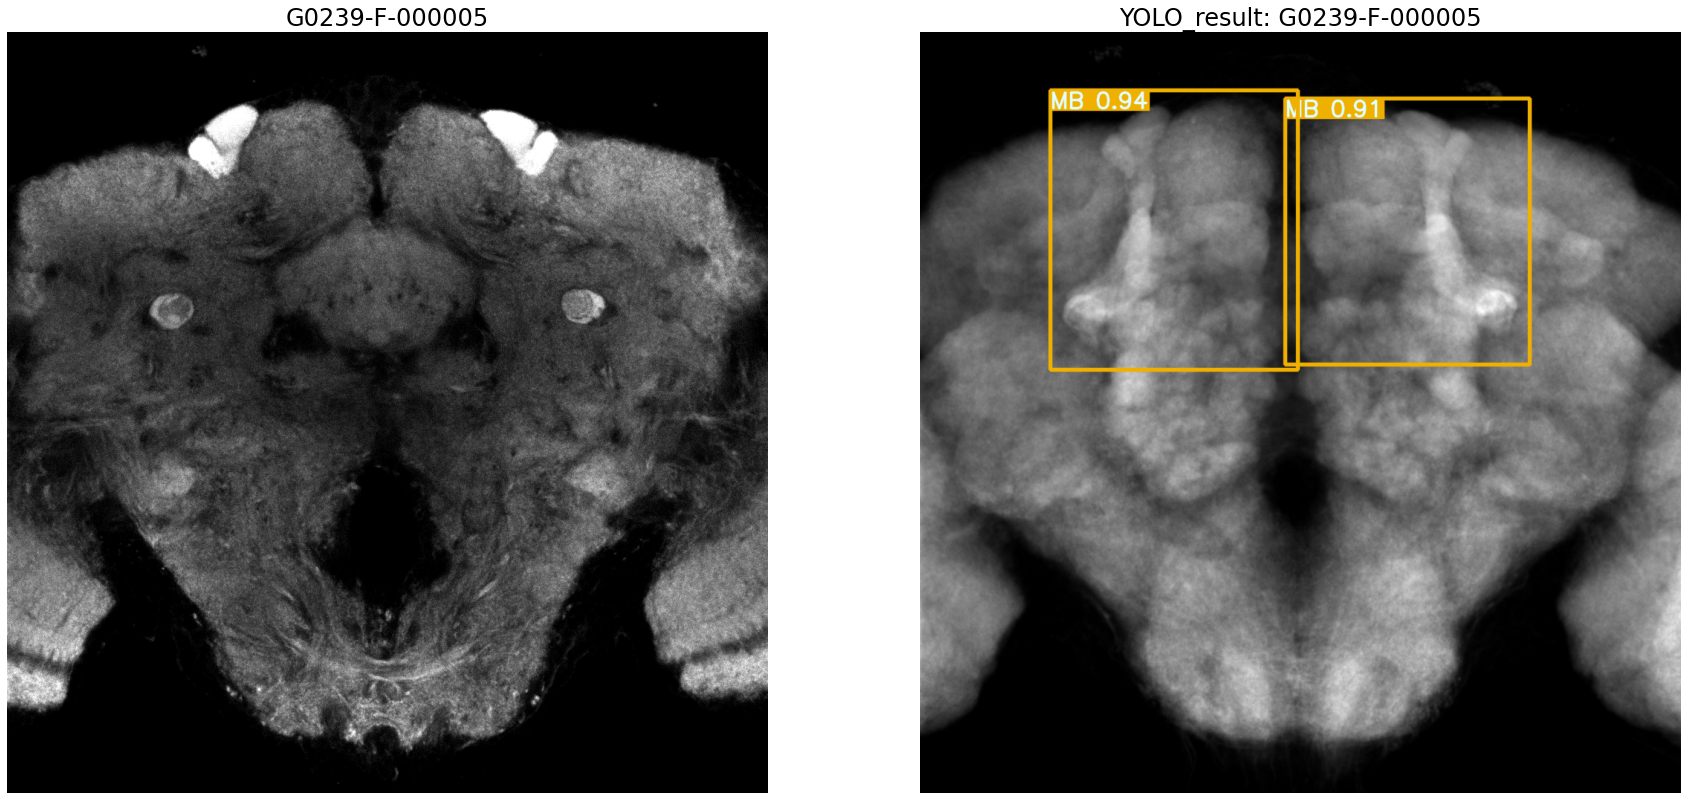

In [15]:
# Step4 Ê∫ñÂÇôÁõÆÊ®ôËÖ¶ÁöÑDLG npyÊ™îÊ°àÔºåÊ∫ñÂÇôÂàáÂâ≤Âá∫ÁâπÂæµÊ°ÜÁöÑÁØÑÂúç ===========Ê∏¨Ë©¶Êü•Áúã G0239-F-000005 DLG & Êé®ÁêÜÁµêÊûú
# ÊâπÈáèÂ∞á18ÂÄãÂ§ßËÖ¶ÈÉΩÊäïÂΩ±Êàê18Âºµ2DÂúñ
Brain_18 = ['5HT1A-M-000005','5-HT1B-M-000008','Cha-F-300158','E0585-F-200015','fru-F-500439','G0239-F-000005','G0239-F-000010','Gad1-F-200344','Gad1-F-400041','Gad1-F-400314','Gad1-F-700093','GH146-M-400001','npf-M-300037','TH-F-100083','Trh-F-200069','Trh-F-700013','VGlut-F-700029','VGlut-F-800014']
DLG = tif.imread(r'DLG_18Brains_Dataset/G0239-F-000005.tif')
print('DLG_shape: ',DLG.shape)
# ÂêåÊôÇÈ°ØÁ§∫ ÁõÆÊ®ôËÖ¶ÁöÑDLG Êüê‰∏ÄÂ±§Ôºå‰ª•Âèä Êé®ÁêÜÁµêÊûúÁöÑÂúñÁâá(Êü•ÁúãMBËÖ¶ÂçÄÁâπÂæµÊ°ÜÊòØÂê¶Ê≠£Á¢∫)
img = cv2.imread('mb_inference/detect/exp/'+Brain_18[5]+'.png')
Z_num = 70
plt.figure(figsize=(30, 60))
#ÁõÆÊ®ôÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
ax = plt.subplot(1, 2, 1)
plt.imshow(DLG[Z_num],cmap = 'PuBu')
ax.set_title("G0239-F-000005",fontsize=24)
plt.axis('off')
plt.gray()
# ÈÄôË£°ZËª∏È†ÜÂ∫èÂíåÊ®ôÊ∫ñËÖ¶Áõ∏Âèç(ÊáâË©≤‰∏çÂΩ±Èüø)
ax = plt.subplot(1, 2, 2)
plt.imshow(img,cmap = 'PuBu')
ax.set_title("YOLO_result: "+Brain_18[5],fontsize=24)
plt.axis('off')
plt.gray()

DLG_shape:  (122, 1024, 1024)


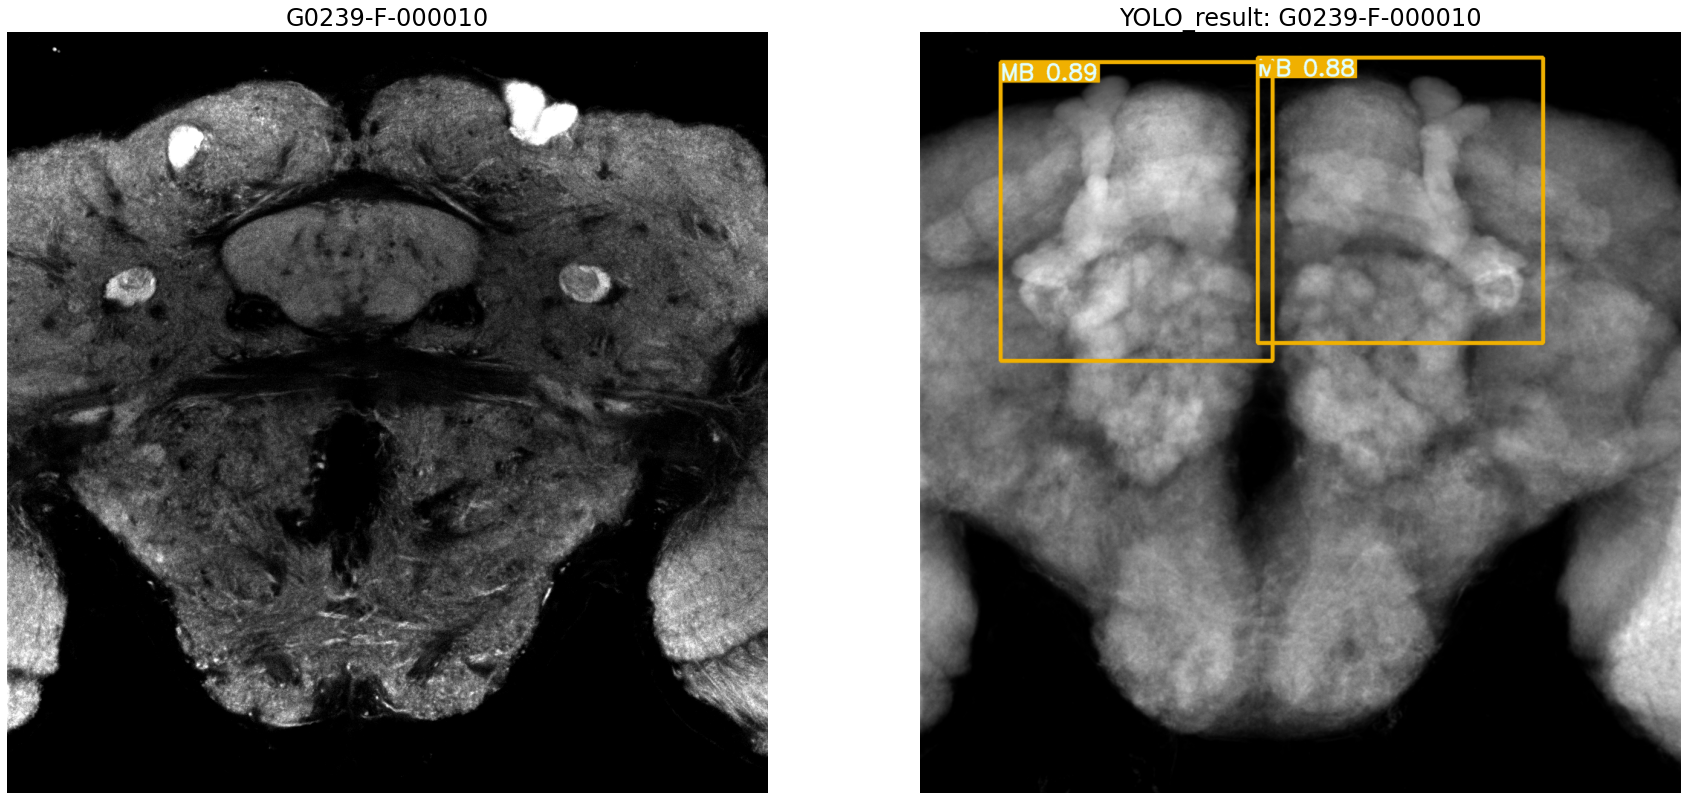

In [16]:
# Step4 Ê∫ñÂÇôÁõÆÊ®ôËÖ¶ÁöÑDLG npyÊ™îÊ°àÔºåÊ∫ñÂÇôÂàáÂâ≤Âá∫ÁâπÂæµÊ°ÜÁöÑÁØÑÂúç ===========Ê∏¨Ë©¶Êü•Áúã G0239-F-000010 DLG & Êé®ÁêÜÁµêÊûú
DLG = tif.imread(r'DLG_18Brains_Dataset/G0239-F-000010.tif')
print('DLG_shape: ',DLG.shape)
# ÂêåÊôÇÈ°ØÁ§∫ ÁõÆÊ®ôËÖ¶ÁöÑDLG Êüê‰∏ÄÂ±§Ôºå‰ª•Âèä Êé®ÁêÜÁµêÊûúÁöÑÂúñÁâá(Êü•ÁúãMBËÖ¶ÂçÄÁâπÂæµÊ°ÜÊòØÂê¶Ê≠£Á¢∫)
img = cv2.imread('mb_inference/detect/exp/'+Brain_18[6]+'.png')
Z_num = 70
plt.figure(figsize=(30, 60))
#ÁõÆÊ®ôÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
ax = plt.subplot(1, 2, 1)
plt.imshow(DLG[Z_num],cmap = 'PuBu')
ax.set_title("G0239-F-000010",fontsize=24)
plt.axis('off')
plt.gray()
# ÈÄôË£°ZËª∏È†ÜÂ∫èÂíåÊ®ôÊ∫ñËÖ¶Áõ∏Âèç(ÊáâË©≤‰∏çÂΩ±Èüø)
ax = plt.subplot(1, 2, 2)
plt.imshow(img,cmap = 'PuBu')
ax.set_title("YOLO_result: "+Brain_18[6],fontsize=24)
plt.axis('off')
plt.gray()

In [17]:
# ===============ÊâπÈáèÂàáÂâ≤ËÖ¶ÂçÄÁØÑÂúç: ÈúÄË¶ÅÁ∏ÆÊîæËá≥168x168Ôºå‰∏¶ÊãìÂ±ïÊàêÂèØÊªëÂãïÂàáÂâ≤ÁöÑÂ∞∫ÂØ∏ÔºåËº∏Âá∫ÂÑ≤Â≠ònpy(ÈúÄÁ¥ÄÈåÑÂéüÂßãÂàáÂâ≤ÂæåÂ∞∫ÂØ∏)===============
# ËÆÄÂèñ DLG_18Brains_Dataset Ë≥áÊñôÂ§æÂÖßÊ™îÊ°àÂêçÁ®±Êúâ _+seg_target+.ome.tiff ÁöÑÊ™îÊ°àÂêçÁ®±ÔºåË£Ω‰ΩúÊàêÂàóË°®(‰ª£Ë°®ÁõÆÂâçÂ∑≤Á∂ìÊúâLabelÁöÑÂ§ßËÖ¶ÂêçÁ®±)
DLG_src_files = os.listdir('DLG_18Brains_Dataset')
LABEL_src_files = [i for i in DLG_src_files if '_'+seg_target+'.ome.tiff' in i]
print('Â∑≤Á∂ìÊúâLabelÁöÑÂ§ßËÖ¶Êï∏Èáè: ',len(LABEL_src_files))
# Â∞áLABEL_src_files ÁöÑÊ™îÊ°àÂêçÁ®±ÂéªÈô§ _+seg_target+.ome.tiff ÊîπÊàê.tifÂæåÔºåÂ≠òÂÖ•DLG_src_files
DLG_src_files = [i.replace('_'+seg_target+'.ome.tiff','.tif') for i in LABEL_src_files]
# ÊâπÈáèËôïÁêÜÂ∑≤Á∂ìÊúâLABELÁöÑÂ§ßËÖ¶: ÁõÆÂâç9È°Ü„ÄÇ DLG_src_files ÊòØDLG tifÊ™îÊ°àÂêçÁ®±ÔºåLABEL_src_files ÊòØÂ∞çÊáâÁöÑLABEL tiffÊ™îÊ°àÂêçÁ®±„ÄÇ
# Â∑≤Á∂ìÂ∞áDLG LABELÁöÑÂêçÁ®±ÈÉΩÊ∫ñÂÇôÂ•ΩÔºå‰∏ã‰∏ÄÊ≠•ÊâπÈáèËôïÁêÜÂàáÂâ≤ÁØÑÂúç

Â∑≤Á∂ìÊúâLabelÁöÑÂ§ßËÖ¶Êï∏Èáè:  18


In [18]:
# ==============Êñ∞Â¢ûYOLOÈ†êÊ∏¨Ê°ÜÊì¥Â§ßÁØÑÂúçÔºåÂõ†ÊáâCALË∑üMBÂÖ±Áî®ÔºåCALÊúÉË∂ÖÂá∫ÁØÑÂúç
# expand_box_size == ÈÇäÈï∑ÂêÑËá™Â¢ûÂä†ÁöÑÁØÑÂúç
expand_box_size = 50
# ÁôºÁèæ‰∏ÄÂÄãÂïèÈ°å:
# Âõ†ÁÇ∫Ë¶ÅÁ≠âÊØî‰æãÁ∏ÆÊîæÊàê168x168ÔºåÊâÄ‰ª•ÊúÉÊ™¢Ê∏¨XYÈÇäÈï∑ÈÄ≤Ë°åÈ°çÂ§ñÊãìÂ±ïÔºå‰ΩÜÊòØÂ¶ÇÊûúÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢ÊúâÂÖ∂‰∏≠‰∏ÄÈÇä<0 Êàñ >1023ÔºåÂâáÊúÉÂ§±Êïó
# Âõ†ÁÇ∫Âè™ÊúâCALÊúâÊ≠§ÂïèÈ°å(Âõ†Â•óÁî®MB ÈÇäÁïåÊ°Ü)ÔºåÊâÄ‰ª•Áõ¥Êé•ÊâãÂãïË™øÊï¥XYÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢ÁöÑÊñπÊ≥ï(‰∏çÂØ´Ëá™ÈÅ©ÊáâÁöÑcode)
# ‰øÆÊîπ‰ΩçÁΩÆ: XÈÇäÈï∑ÂíåYÈÇäÈï∑ÊØîËºÉË∑üÊãìÂ±ïÊôÇÔºåÂ∞çYÈÉ®ÂàÜ+10ÔºåÂõ†ÁÇ∫YÈÇäÊØîËºÉÂ∏∏Êé•Ëøë0

In [19]:
# Step5 ÊâπÈáèËÆÄÂèñ DLG_18Brains_Dataset Ë≥áÊñôÂ§æ‰∏≠ÁöÑ18È°ÜÂ§ßËÖ¶DLG & LABELÔºå‰∏¶ÂàáÂâ≤ÂæåÁ∏ÆÊîæÔºåÂÜçÂä†‰ª•ÊãìÂ±ïÊàêÊªëÂãïË¶ñÁ™óÊâÄÈúÄÁöÑÂ∞∫ÂØ∏
# DLG_src_files = ÊòØDLGÂàóË°®
# LABEL_src_files = ÊòØLABELÂàóË°®
# ÈñãÂßãÊâπÈáèËôïÁêÜ
!rm -r 2023_18_Brain_3DUNET_DataSet
!mkdir 2023_18_Brain_3DUNET_DataSet
for num in range(len(DLG_src_files)):
    print(num)
    # Ë®≠ÂÆöÊâπÊ¨°ÁöÑÂ§ßËÖ¶ÂêçÁ®±: target_name
    target_name = DLG_src_files[num][:-4]
    print(target_name)
    # ËÆÄÂèñ DLG + LABEL
    DLG = tif.imread(r'DLG_18Brains_Dataset/'+target_name+'.tif')
    # Âõ†ÁÇ∫ÂæåÁ∫åË¶ÅÂàáÂâ≤DLGÁØÑÂúçÈúÄË¶ÅÁî®Âà∞ WholeBrain_DLG_Amira
    WholeBrain_DLG_Amira = DLG.copy()
    print('DLG_shape: ',DLG.shape)
    # ËÆÄÂèñLABEL
    Label = tif.imread(r'DLG_18Brains_Dataset/'+target_name+'_'+seg_target+'.ome.tiff')
    Label[Label>0] =1
    Label = Label.astype('uint8')
    WholeBrain_LABEL_Amira = Label.copy()
    print('Label_shape: ',Label.shape)
    # =============
    txt_path  = os.path.join('mb_inference/detect/exp/labels','%s.txt'%(target_name))  #Êú¨Ê¨°Ê£ÄÊµãÁªìÊûútxtË∑ØÂæÑ
    source_file = open(txt_path)
    image = cv2.imread('waiting_for_infer/'+target_name+'.png')
    img = cv2.imread('mb_inference/detect/exp/'+target_name+'.png')
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
    # Âõ†ÁÇ∫ÊúÉ‰∏çÂè™‰∏ÄÁµÑ x1 x2 y1 y2
    x1=[]
    x2=[]
    y1=[]
    y2=[]
    for line in source_file: #‰æãÈÅç txtÊñá‰ª∂ÂæóÊØè‰∏ÄË°å
        staff = line.split() #ÂØπÊØèË°åÂÜÖÂÆπ ÈÄöËøá‰ª•Á©∫Ê†º‰∏∫ÂàÜÈöîÁ¨¶ÂØπÂ≠óÁ¨¶‰∏≤ËøõË°åÂàáÁâá
        class_idx = int(staff[0])

        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1.append(round(x_center-w/2))
        y1.append(round(y_center-h/2))
        x2.append(round(x_center+w/2))
        y2.append(round(y_center+h/2) )
    # # ÁõÆÂâçÊòØÂñÆÁ¥îÂÅöÂúñÊ™¢Êü•!!!!
    # # ‰ΩúÂúñÂ±ïÁ§∫txtËÆÄÂèñÂá∫ÂæóÁâπÂæµÊ°ÜÊòØÂê¶Ê≠£Á¢∫(Âè≥ËÖ¶)
    # X_start = x1[0]
    # Y_start = y1[0]
    # X_end = x2[0]
    # Y_end = y2[0]
    # X_length = X_end-X_start
    # Y_length = Y_end-Y_start
    # # ÂÖàÁπ™Ë£ΩÂá∫ÈúÄË¶ÅÂàáÂâ≤Âá∫ÁöÑÁØÑÂúç
    # # Á¢∫Ë™çÂñÆÂºµÁî®
    # #img_gray = WholeBrain_DLG_Amira[70]# ÈÄôÊòØÁúãÊüê‰∏ÄÂàáÁâá
    # img_gray = img
    # fig, ax = plt.subplots(figsize=(10,10))
    # #plt.axis(False)
    # ax.imshow(img_gray,cmap='gray')
    # for i in range(1):
    #   # XÁ¨¨‰∏ÄÊ¢ùÁ∑öÔºà‰∏äÊñπÊ©´Á∑öÔºâ
    #   x_1 = np.arange(X_start , X_start+X_length)
    #   ax.plot(x_1, np.full_like(x_1,Y_start) , linewidth=2, alpha=1,color='y')

    #   # XÁ¨¨‰∫åÊ¢ùÁ∑ö(‰∏ãÊñπÊ©´Á∑ö)
    #   ax.plot(x_1, np.full_like(x_1,Y_start+Y_length) , linewidth=2, alpha=1,color='y')

    #   # YÁ¨¨‰∏ÄÊ¢ùÁ∑ö
    #   y_1 = np.arange(Y_start, Y_start+Y_length)
    #   ax.plot(np.full_like(y_1,X_start), y_1 , linewidth=2, alpha=1,color='y')

    #   ax.plot(np.full_like(y_1,X_start+X_length), y_1 , linewidth=2, alpha=1,color='y')
    # plt.axis('off')
    # plt.show()
    # X_start = x1[1]
    # Y_start = y1[1]
    # X_end = x2[1]
    # Y_end = y2[1]
    # X_length = X_end-X_start
    # Y_length = Y_end-Y_start
    # # ÂÖàÁπ™Ë£ΩÂá∫ÈúÄË¶ÅÂàáÂâ≤Âá∫ÁöÑÁØÑÂúç
    # # Á¢∫Ë™çÂñÆÂºµÁî®
    # #img_gray = WholeBrain_Label_0_1_2[47]# ÈÄôÊòØÁúãÊüê‰∏ÄÂàáÁâá
    # img_gray = img
    # fig, ax = plt.subplots(figsize=(10,10))
    # #plt.axis(False)
    # ax.imshow(img_gray,cmap='gray')
    # for i in range(1):
    #   # XÁ¨¨‰∏ÄÊ¢ùÁ∑öÔºà‰∏äÊñπÊ©´Á∑öÔºâ
    #   x_1 = np.arange(X_start , X_start+X_length)
    #   ax.plot(x_1, np.full_like(x_1,Y_start) , linewidth=2, alpha=1,color='y')

    #   # XÁ¨¨‰∫åÊ¢ùÁ∑ö(‰∏ãÊñπÊ©´Á∑ö)
    #   ax.plot(x_1, np.full_like(x_1,Y_start+Y_length) , linewidth=2, alpha=1,color='y')

    #   # YÁ¨¨‰∏ÄÊ¢ùÁ∑ö
    #   y_1 = np.arange(Y_start, Y_start+Y_length)
    #   ax.plot(np.full_like(y_1,X_start), y_1 , linewidth=2, alpha=1,color='y')

    #   ax.plot(np.full_like(y_1,X_start+X_length), y_1 , linewidth=2, alpha=1,color='y')
    # plt.axis('off')
    # plt.show()
    # Step_of_slide = 20 # ÊªëÂãïÊ≠•Êï∏
    Step_of_slide = 20 # ÊªëÂãïÊ≠•Êï∏
    # ÂàáÂâ≤ÂæåÈúÄË¶ÅÊñ∞Â¢ûÊãìÂ±ïZËª∏ÁöÑ‰ª£Á¢º
    # ======================================Ê≠§ÊÆµÊòØËôïÁêÜDLGÈÉ®ÂàÜ================================
    # ÂÖàË©ï‰º∞ÊúâÂ§öÂ∞ëÁâπÂæµÊ°Ü e.g 0~2
    num_of_yolo_box = len(x1)
    # Âà§Êñ∑ÊòØÂê¶ÊúâÂÅµÊ∏¨Âà∞MBËÖ¶ÂçÄÔºåËã•ÁÑ°Áõ¥Êé•ÁµêÊùü
    if num_of_yolo_box == 0:
        print('Ê≠§Â§ßËÖ¶Ê≤íÊúâMBËÖ¶ÂçÄ')
    else:
        # Á¢∫ÂÆöÊúâMBËÖ¶ÂçÄÔºåÊâçÈÄ≤Ë°å‰∏ã‰∏ÄÊ≠•
        #============
        # 1ÂÄãMBÂíå2ÂÄãMBÁöÑÂ§ßËÖ¶‰ΩøÁî®‰∏çÂêåÊµÅÁ®ã
        # ÂÖàÂØ´1ÂÄãMBÁöÑÁâàÊú¨
        if num_of_yolo_box ==1:
            print('ÂÉÖÊúâ‰∏ÄÂÄãËÖ¶ÂçÄ')
            # No_1_BOX ÊòØË¶ÅÂÑ≤Â≠òÂàáÂâ≤Âá∫‰æÜÁöÑ3D ÂΩ±ÂÉè(ÂÆåÊàêÁ∏ÆÊîæ)
            No_1_BOX = []
            X_start = max(0, x1[0] - expand_box_size)  # Á¢∫‰øù X_start >= 0
            Y_start = y1[0]
            X_end = min(1023, x2[0] + expand_box_size)  # Á¢∫‰øù X_end <= 1023
            Y_end = min(1023, y2[0] + expand_box_size)  # Á¢∫‰øù Y_end <= 1023
            X_length = X_end-X_start
            Y_length = Y_end-Y_start
            # Â∑≤Á∂ìÊèêÂèñÂá∫ÁâπÂæµÊ°ÜÁöÑÈï∑ÂØ¨ÔºåÈúÄË¶ÅÂà§Âà•ÊòØÂê¶Â∑≤Á∂ìÊòØÊ≠£ÊñπÂûãÔºåËã•ÈùûÔºåÂâáÊãìÂ±ïÊüê‰∏ÄÈÇäÈï∑
            # Â¶ÇÊûúXÈÇäÂ§ßÊñºYÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            # =========================================2023/09/19ÊâãÂãï‰øÆÊîπÔºåÂÉÖÂ∞çYÈÇä+10=========================================
            if X_length-Y_length>0:
                print('XÈÇäÂ§ßÊñºYÈÇä')
                X_start = X_start
                Y_start = Y_start-((X_length-Y_length)//2)+10
                X_end = X_end
                Y_end = Y_end+(X_length-Y_length-(X_length-Y_length)//2)+10
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # Â¶ÇÊûúYÈÇäÂ§ßÊñºXÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            if Y_length-X_length>0:
                print('YÈÇäÂ§ßÊñºXÈÇä')
                X_start = X_start-((Y_length-X_length)//2)
                Y_start = Y_start
                X_end = X_end+(Y_length-X_length-(Y_length-X_length)//2)
                Y_end = Y_end
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # ====‰ª•‰∏äÂÆåÊàê‰∏ÄÂÄãËÖ¶ÂçÄÁöÑÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢Ôºå‰∏ã‰∏ÄÊ≠•: Á¥ÄÈåÑ‰∏ãÁõÆÂâçÁöÑÈï∑ÂØ¨‰ΩçÁΩÆ(ÊúÄÂæåË¶ÅÊîæÂõûDLGÁî®)Ôºå‰∏¶ÈñãÂßãÁ∏ÆÊîæËá≥ 168x168
            # log(Á¥ÄÈåÑ)ÂàáÂâ≤Âá∫‰æÜÁöÑÂ∫ßÊ®ô(Êú™‰æÜË¶ÅÊîæÂõû)
            X_start_of_No1 = X_start
            Y_start_of_No1 = Y_start
            X_end_of_No1 = X_end
            Y_end_of_No1 = Y_end
            # Á¥ÄÈåÑÁ∏ÆÊîæÂâçÁöÑÂéüÂßãÈï∑ÂØ¨
            X_length_of_No1 = X_length
            Y_length_of_No1 = Y_length
            # ÈñãÂßãÂàáÂâ≤
            WholeBrain_DLG_of_No1 = []
            for i in range(len(WholeBrain_DLG_Amira)):
                WholeBrain_DLG_of_No1.append(WholeBrain_DLG_Amira[i,Y_start:Y_end,X_start:X_end])
            WholeBrain_DLG_of_No1 = np.array(WholeBrain_DLG_of_No1)
            print('ÂàáÂâ≤Âæå‰πãNo1_DLG: ',WholeBrain_DLG_of_No1.shape)
            # ÈñãÂßãÁ∏ÆÊîæ
            # Á∏ÆÂ∞èÊàñÊîæÂ§ßÁî®‰∏çÂêåÁöÑÊñπÊ≥ïÊïàÊûúÊõ¥Â•Ω
            # Â¶ÇÊûúÈúÄË¶ÅÁ∏ÆÂ∞è Êé°Áî® INTER_AREA 
            if X_length_of_No1>168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_AREA))
                No_1_BOX = np.array(No_1_BOX)
                print('Á∏ÆÂ∞èÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # Â¶ÇÊûúÈúÄË¶ÅÊîæÂ§ß Êé°Áî® INTER_CUBIC 
            if X_length_of_No1<168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_CUBIC))
                No_1_BOX = np.array(No_1_BOX)
                print('ÊîæÂ§ßÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # Â∞áÂîØ‰∏ÄÁöÑÁ∏ÆÊîæÂ•ΩÁöÑÁâπÂæµÊ°ÜËº∏Âá∫
            # For_FCN_Inference = No_1_BOX
            # Á¥ÄÈåÑÂàáÂâ≤ÂæåÁöÑÂéüÂßãÂ∞∫ÂØ∏: WholeBrain_DLG_of_No1.shape
            # ÈñãÂßãÊãìÂ±ïÂàáÂâ≤Âæå+Á∏ÆÊîæÂæåÁöÑZËª∏:
            # Áï∂ÂâçËôïÁêÜËÖ¶ÂçÄËÆäÊï∏: No_1_BOX
            Current_Brain = No_1_BOX
            # ÁÇ∫‰∫ÜË®òÈåÑÁ∏ΩÂÖ±Ê∑ªÂä†ÂπæÂ±§
            Num_layers_need_del = 0
            for i in range(100):
                # Âà§Êñ∑Ê≠§ËÖ¶ÂçÄZËª∏ÊòØÂê¶<64
                if len(Current_Brain)<64:
                    Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                    # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                    Num_layers_need_del = Num_layers_need_del+1
                elif len(Current_Brain)==64:
                    break
                elif len(Current_Brain)>64:
                    if (len(Current_Brain)-64)%Step_of_slide ==0:
                        break
                    else:
                        Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                        # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                        Num_layers_need_del = Num_layers_need_del+1
            print('Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏: ',Num_layers_need_del)
            print('ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',No_1_BOX.shape)
            print('ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',Current_Brain.shape)
            No_1_BOX = Current_Brain
            # Ëº∏Âá∫Ê≠§ËÖ¶DLG Âà∞ 2023_18_Brain_3DUNET_DataSet
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_DLG',No_1_BOX)
            # =============2023/10/10 Êñ∞Â¢ûËº∏Âá∫ÂéüÂßãËß£ÊûêÂ∫¶ÁöÑDLG & LABEL=============
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_original_DLG',WholeBrain_DLG_of_No1)
    # =============================================================
        # 1ÂÄãMBÂíå2ÂÄãMBÁöÑÂ§ßËÖ¶‰ΩøÁî®‰∏çÂêåÊµÅÁ®ã
        # ÂØ´2ÂÄãMBÁöÑÁâàÊú¨
        if num_of_yolo_box ==2:
            print('Êúâ‰∫åÂÄãËÖ¶ÂçÄ')
            # =========ÂÖàËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ
            # No_1_BOX ÊòØË¶ÅÂÑ≤Â≠òÂàáÂâ≤Âá∫‰æÜÁöÑ3D ÂΩ±ÂÉè(ÂÆåÊàêÁ∏ÆÊîæ)
            print('=========')
            print('ËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ')
            No_1_BOX = []
            X_start = max(0, x1[0] - expand_box_size)  # Á¢∫‰øù X_start >= 0
            Y_start = y1[0]
            X_end = min(1023, x2[0] + expand_box_size)  # Á¢∫‰øù X_end <= 1023
            Y_end = min(1023, y2[0] + expand_box_size)  # Á¢∫‰øù Y_end <= 1023
            X_length = X_end-X_start
            Y_length = Y_end-Y_start
            # Â∑≤Á∂ìÊèêÂèñÂá∫ÁâπÂæµÊ°ÜÁöÑÈï∑ÂØ¨ÔºåÈúÄË¶ÅÂà§Âà•ÊòØÂê¶Â∑≤Á∂ìÊòØÊ≠£ÊñπÂûãÔºåËã•ÈùûÔºåÂâáÊãìÂ±ïÊüê‰∏ÄÈÇäÈï∑
            # Â¶ÇÊûúXÈÇäÂ§ßÊñºYÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            # =========================================2023/09/19ÊâãÂãï‰øÆÊîπÔºåÂÉÖÂ∞çYÈÇä+10=========================================
            if X_length-Y_length>0:
                print('XÈÇäÂ§ßÊñºYÈÇä')
                X_start = X_start
                Y_start = Y_start-((X_length-Y_length)//2)+10
                X_end = X_end
                Y_end = Y_end+(X_length-Y_length-(X_length-Y_length)//2)+10
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # Â¶ÇÊûúYÈÇäÂ§ßÊñºXÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            if Y_length-X_length>0:
                print('YÈÇäÂ§ßÊñºXÈÇä')
                X_start = X_start-((Y_length-X_length)//2)
                Y_start = Y_start
                X_end = X_end+(Y_length-X_length-(Y_length-X_length)//2)
                Y_end = Y_end
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # ====‰ª•‰∏äÂÆåÊàê‰∏ÄÂÄãËÖ¶ÂçÄÁöÑÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢Ôºå‰∏ã‰∏ÄÊ≠•: Á¥ÄÈåÑ‰∏ãÁõÆÂâçÁöÑÈï∑ÂØ¨‰ΩçÁΩÆ(ÊúÄÂæåË¶ÅÊîæÂõûDLGÁî®)Ôºå‰∏¶ÈñãÂßãÁ∏ÆÊîæËá≥ 168x168
            # log(Á¥ÄÈåÑ)ÂàáÂâ≤Âá∫‰æÜÁöÑÂ∫ßÊ®ô(Êú™‰æÜË¶ÅÊîæÂõû)
            X_start_of_No1 = X_start
            Y_start_of_No1 = Y_start
            X_end_of_No1 = X_end
            Y_end_of_No1 = Y_end
            # Á¥ÄÈåÑÁ∏ÆÊîæÂâçÁöÑÂéüÂßãÈï∑ÂØ¨
            X_length_of_No1 = X_length
            Y_length_of_No1 = Y_length
            # ÈñãÂßãÂàáÂâ≤
            WholeBrain_DLG_of_No1 = []
            for i in range(len(WholeBrain_DLG_Amira)):
                WholeBrain_DLG_of_No1.append(WholeBrain_DLG_Amira[i,Y_start:Y_end,X_start:X_end])
            WholeBrain_DLG_of_No1 = np.array(WholeBrain_DLG_of_No1)
            print('ÂàáÂâ≤Âæå‰πãNo1_DLG: ',WholeBrain_DLG_of_No1.shape)
            # ÈñãÂßãÁ∏ÆÊîæ
            # Á∏ÆÂ∞èÊàñÊîæÂ§ßÁî®‰∏çÂêåÁöÑÊñπÊ≥ïÊïàÊûúÊõ¥Â•Ω
            # Â¶ÇÊûúÈúÄË¶ÅÁ∏ÆÂ∞è Êé°Áî® INTER_AREA 
            if X_length_of_No1>168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_AREA))
                No_1_BOX = np.array(No_1_BOX)
                print('Á∏ÆÂ∞èÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # Â¶ÇÊûúÈúÄË¶ÅÊîæÂ§ß Êé°Áî® INTER_CUBIC 
            if X_length_of_No1<168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_CUBIC))
                No_1_BOX = np.array(No_1_BOX)
                print('ÊîæÂ§ßÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # Á¥ÄÈåÑÂàáÂâ≤ÂæåÁöÑÂéüÂßãÂ∞∫ÂØ∏: WholeBrain_DLG_of_No1.shape
            # ÈñãÂßãÊãìÂ±ïÂàáÂâ≤Âæå+Á∏ÆÊîæÂæåÁöÑZËª∏:
            # Áï∂ÂâçËôïÁêÜËÖ¶ÂçÄËÆäÊï∏: No_1_BOX
            Current_Brain = No_1_BOX
            # ÁÇ∫‰∫ÜË®òÈåÑÁ∏ΩÂÖ±Ê∑ªÂä†ÂπæÂ±§
            Num_layers_need_del = 0
            for i in range(100):
                # Âà§Êñ∑Ê≠§ËÖ¶ÂçÄZËª∏ÊòØÂê¶<64
                if len(Current_Brain)<64:
                    Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                    # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                    Num_layers_need_del = Num_layers_need_del+1
                elif len(Current_Brain)==64:
                    break
                elif len(Current_Brain)>64:
                    if (len(Current_Brain)-64)%Step_of_slide ==0:
                        break
                    else:
                        Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                        # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                        Num_layers_need_del = Num_layers_need_del+1
            print('Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏: ',Num_layers_need_del)
            print('ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',No_1_BOX.shape)
            print('ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',Current_Brain.shape)
            No_1_BOX = Current_Brain
    # =======================================
            # =========ËôïÁêÜÁ¨¨2ÂÄãËÖ¶ÂçÄ
            # No_2_BOX ÊòØË¶ÅÂÑ≤Â≠òÂàáÂâ≤Âá∫‰æÜÁöÑ3D ÂΩ±ÂÉè(ÂÆåÊàêÁ∏ÆÊîæ)
            print('=========')
            print('ËôïÁêÜÁ¨¨‰∫åÂÄãËÖ¶ÂçÄ')
            No_2_BOX = []
            X_start = max(0, x1[1] - expand_box_size)  # Á¢∫‰øù X_start >= 0
            Y_start = y1[1]
            X_end = min(1023, x2[1] + expand_box_size)  # Á¢∫‰øù X_end <= 1023
            Y_end = min(1023, y2[1] + expand_box_size)  # Á¢∫‰øù Y_end <= 1023
            X_length = X_end-X_start
            Y_length = Y_end-Y_start
            # Â∑≤Á∂ìÊèêÂèñÂá∫ÁâπÂæµÊ°ÜÁöÑÈï∑ÂØ¨ÔºåÈúÄË¶ÅÂà§Âà•ÊòØÂê¶Â∑≤Á∂ìÊòØÊ≠£ÊñπÂûãÔºåËã•ÈùûÔºåÂâáÊãìÂ±ïÊüê‰∏ÄÈÇäÈï∑
            # Â¶ÇÊûúXÈÇäÂ§ßÊñºYÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            # =========================================2023/09/19ÊâãÂãï‰øÆÊîπÔºåÂÉÖÂ∞çYÈÇä+10=========================================
            if X_length-Y_length>0:
                print('XÈÇäÂ§ßÊñºYÈÇä')
                X_start = X_start
                Y_start = Y_start-((X_length-Y_length)//2)+10
                X_end = X_end
                Y_end = Y_end+(X_length-Y_length-(X_length-Y_length)//2)+10
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # Â¶ÇÊûúYÈÇäÂ§ßÊñºXÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            if Y_length-X_length>0:
                print('YÈÇäÂ§ßÊñºXÈÇä')
                X_start = X_start-((Y_length-X_length)//2)
                Y_start = Y_start
                X_end = X_end+(Y_length-X_length-(Y_length-X_length)//2)
                Y_end = Y_end
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # ====‰ª•‰∏äÂÆåÊàê‰∏ÄÂÄãËÖ¶ÂçÄÁöÑÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢Ôºå‰∏ã‰∏ÄÊ≠•: Á¥ÄÈåÑ‰∏ãÁõÆÂâçÁöÑÈï∑ÂØ¨‰ΩçÁΩÆ(ÊúÄÂæåË¶ÅÊîæÂõûDLGÁî®)Ôºå‰∏¶ÈñãÂßãÁ∏ÆÊîæËá≥ 168x168
            # log(Á¥ÄÈåÑ)ÂàáÂâ≤Âá∫‰æÜÁöÑÂ∫ßÊ®ô(Êú™‰æÜË¶ÅÊîæÂõû)
            X_start_of_No2 = X_start
            Y_start_of_No2 = Y_start
            X_end_of_No2 = X_end
            Y_end_of_No2 = Y_end
            # Á¥ÄÈåÑÁ∏ÆÊîæÂâçÁöÑÂéüÂßãÈï∑ÂØ¨
            X_length_of_No2 = X_length
            Y_length_of_No2 = Y_length
            # ÈñãÂßãÂàáÂâ≤
            WholeBrain_DLG_of_No2 = []
            for i in range(len(WholeBrain_DLG_Amira)):
                WholeBrain_DLG_of_No2.append(WholeBrain_DLG_Amira[i,Y_start:Y_end,X_start:X_end])
            WholeBrain_DLG_of_No2 = np.array(WholeBrain_DLG_of_No2)
            print('ÂàáÂâ≤Âæå‰πãNo2_DLG: ',WholeBrain_DLG_of_No2.shape)
            # ÈñãÂßãÁ∏ÆÊîæ
            # Á∏ÆÂ∞èÊàñÊîæÂ§ßÁî®‰∏çÂêåÁöÑÊñπÊ≥ïÊïàÊûúÊõ¥Â•Ω
            # Â¶ÇÊûúÈúÄË¶ÅÁ∏ÆÂ∞è Êé°Áî® INTER_AREA 
            if X_length_of_No1>168:
                for i in range(len(WholeBrain_DLG_of_No2)):
                    No_2_BOX.append(cv2.resize(WholeBrain_DLG_of_No2[i], (168, 168), interpolation=cv2.INTER_AREA))
                No_2_BOX = np.array(No_2_BOX)
                print('Á∏ÆÂ∞èÂæå‰πãNo2_DLG: ',No_2_BOX.shape)
            # Â¶ÇÊûúÈúÄË¶ÅÊîæÂ§ß Êé°Áî® INTER_CUBIC 
            if X_length_of_No1<168:
                for i in range(len(WholeBrain_DLG_of_No2)):
                    No_2_BOX.append(cv2.resize(WholeBrain_DLG_of_No2[i], (168, 168), interpolation=cv2.INTER_CUBIC))
                No_2_BOX = np.array(No_2_BOX)
                print('ÊîæÂ§ßÂæå‰πãNo2_DLG: ',No_2_BOX.shape)
            # Â∞áÂîØ‰∏ÄÁöÑÁ∏ÆÊîæÂ•ΩÁöÑÁâπÂæµÊ°ÜËº∏Âá∫
            # For_FCN_Inference = np.append(No_1_BOX, No_2_BOX, axis=0)
            # Á¥ÄÈåÑÂàáÂâ≤ÂæåÁöÑÂéüÂßãÂ∞∫ÂØ∏: WholeBrain_DLG_of_No1.shape
            # ÈñãÂßãÊãìÂ±ïÂàáÂâ≤Âæå+Á∏ÆÊîæÂæåÁöÑZËª∏:
            # Áï∂ÂâçËôïÁêÜËÖ¶ÂçÄËÆäÊï∏: No_2_BOX
            Current_Brain = No_2_BOX
            # ÁÇ∫‰∫ÜË®òÈåÑÁ∏ΩÂÖ±Ê∑ªÂä†ÂπæÂ±§
            Num_layers_need_del = 0
            for i in range(100):
                # Âà§Êñ∑Ê≠§ËÖ¶ÂçÄZËª∏ÊòØÂê¶<64
                if len(Current_Brain)<64:
                    Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                    # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                    Num_layers_need_del = Num_layers_need_del+1
                elif len(Current_Brain)==64:
                    break
                elif len(Current_Brain)>64:
                    if (len(Current_Brain)-64)%Step_of_slide ==0:
                        break
                    else:
                        Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                        # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                        Num_layers_need_del = Num_layers_need_del+1
            print('Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏: ',Num_layers_need_del)
            print('ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',No_2_BOX.shape)
            print('ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',Current_Brain.shape)
            No_2_BOX = Current_Brain
            # Ëº∏Âá∫Ê≠§ËÖ¶DLG Âà∞ 2023_18_Brain_3DUNET_DataSet
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_DLG',No_1_BOX)
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_2_DLG',No_2_BOX)
            # =============2023/10/10 Êñ∞Â¢ûËº∏Âá∫ÂéüÂßãËß£ÊûêÂ∫¶ÁöÑDLG & LABEL=============
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_original_DLG',WholeBrain_DLG_of_No1)
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_2_original_DLG',WholeBrain_DLG_of_No2)

    # ‰ª•‰∏äÂ∑≤Á∂ìÂÆåÊàêÂàáÂâ≤ËÖ¶ÂçÄÁâπÂæµÊ°ÜÔºå‰∏¶‰∏îÁ∏ÆÊîæÁΩÆFCNÊâÄÈúÄÂ§ßÂ∞è
    # For_training_DLG = For_FCN_Inference.copy()
    # print('ÂàáÂâ≤ÂÆåÊàê_Ê∫ñÂÇôË®ìÁ∑¥ÁöÑË®ìÁ∑¥ÈõÜDLGÂΩ¢ÁãÄ: ',For_training_DLG.shape)
    
    # ======================================Ê≠§ÊÆµÊòØËôïÁêÜLABELÈÉ®ÂàÜ================================
    # ÂÖàË©ï‰º∞ÊúâÂ§öÂ∞ëÁâπÂæµÊ°Ü e.g 0~2
    num_of_yolo_box = len(x1)
    # Âà§Êñ∑ÊòØÂê¶ÊúâÂÅµÊ∏¨Âà∞MBËÖ¶ÂçÄÔºåËã•ÁÑ°Áõ¥Êé•ÁµêÊùü
    if num_of_yolo_box == 0:
        print('Ê≠§Â§ßËÖ¶Ê≤íÊúâMBËÖ¶ÂçÄ')
    else:
        # Á¢∫ÂÆöÊúâMBËÖ¶ÂçÄÔºåÊâçÈÄ≤Ë°å‰∏ã‰∏ÄÊ≠•
        #============
        # 1ÂÄãMBÂíå2ÂÄãMBÁöÑÂ§ßËÖ¶‰ΩøÁî®‰∏çÂêåÊµÅÁ®ã
        # ÂÖàÂØ´1ÂÄãMBÁöÑÁâàÊú¨
        if num_of_yolo_box ==1:
            print('ÂÉÖÊúâ‰∏ÄÂÄãËÖ¶ÂçÄ')
            # No_1_BOX ÊòØË¶ÅÂÑ≤Â≠òÂàáÂâ≤Âá∫‰æÜÁöÑ3D ÂΩ±ÂÉè(ÂÆåÊàêÁ∏ÆÊîæ)
            No_1_BOX = []
            X_start = max(0, x1[0] - expand_box_size)  # Á¢∫‰øù X_start >= 0
            Y_start = y1[0]
            X_end = min(1023, x2[0] + expand_box_size)  # Á¢∫‰øù X_end <= 1023
            Y_end = min(1023, y2[0] + expand_box_size)  # Á¢∫‰øù Y_end <= 1023
            X_length = X_end-X_start
            Y_length = Y_end-Y_start
            # Â∑≤Á∂ìÊèêÂèñÂá∫ÁâπÂæµÊ°ÜÁöÑÈï∑ÂØ¨ÔºåÈúÄË¶ÅÂà§Âà•ÊòØÂê¶Â∑≤Á∂ìÊòØÊ≠£ÊñπÂûãÔºåËã•ÈùûÔºåÂâáÊãìÂ±ïÊüê‰∏ÄÈÇäÈï∑
            # Â¶ÇÊûúXÈÇäÂ§ßÊñºYÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            # =========================================2023/09/19ÊâãÂãï‰øÆÊîπÔºåÂÉÖÂ∞çYÈÇä+10=========================================
            if X_length-Y_length>0:
                print('XÈÇäÂ§ßÊñºYÈÇä')
                X_start = X_start
                Y_start = Y_start-((X_length-Y_length)//2)+10
                X_end = X_end
                Y_end = Y_end+(X_length-Y_length-(X_length-Y_length)//2)+10
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # Â¶ÇÊûúYÈÇäÂ§ßÊñºXÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            if Y_length-X_length>0:
                print('YÈÇäÂ§ßÊñºXÈÇä')
                X_start = X_start-((Y_length-X_length)//2)
                Y_start = Y_start
                X_end = X_end+(Y_length-X_length-(Y_length-X_length)//2)
                Y_end = Y_end
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # ====‰ª•‰∏äÂÆåÊàê‰∏ÄÂÄãËÖ¶ÂçÄÁöÑÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢Ôºå‰∏ã‰∏ÄÊ≠•: Á¥ÄÈåÑ‰∏ãÁõÆÂâçÁöÑÈï∑ÂØ¨‰ΩçÁΩÆ(ÊúÄÂæåË¶ÅÊîæÂõûDLGÁî®)Ôºå‰∏¶ÈñãÂßãÁ∏ÆÊîæËá≥ 168x168
            # log(Á¥ÄÈåÑ)ÂàáÂâ≤Âá∫‰æÜÁöÑÂ∫ßÊ®ô(Êú™‰æÜË¶ÅÊîæÂõû)
            X_start_of_No1 = X_start
            Y_start_of_No1 = Y_start
            X_end_of_No1 = X_end
            Y_end_of_No1 = Y_end
            # Á¥ÄÈåÑÁ∏ÆÊîæÂâçÁöÑÂéüÂßãÈï∑ÂØ¨
            X_length_of_No1 = X_length
            Y_length_of_No1 = Y_length
            # ÈñãÂßãÂàáÂâ≤
            WholeBrain_DLG_of_No1 = []
            for i in range(len(WholeBrain_DLG_Amira)):
                WholeBrain_DLG_of_No1.append(WholeBrain_LABEL_Amira[i,Y_start:Y_end,X_start:X_end])
            WholeBrain_DLG_of_No1 = np.array(WholeBrain_DLG_of_No1)
            print('ÂàáÂâ≤Âæå‰πãNo1_DLG: ',WholeBrain_DLG_of_No1.shape)
            # ÈñãÂßãÁ∏ÆÊîæ
            # Á∏ÆÂ∞èÊàñÊîæÂ§ßÁî®‰∏çÂêåÁöÑÊñπÊ≥ïÊïàÊûúÊõ¥Â•Ω
            # Â¶ÇÊûúÈúÄË¶ÅÁ∏ÆÂ∞è Êé°Áî® INTER_AREA 
            if X_length_of_No1>168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_AREA))
                No_1_BOX = np.array(No_1_BOX)
                print('Á∏ÆÂ∞èÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # Â¶ÇÊûúÈúÄË¶ÅÊîæÂ§ß Êé°Áî® INTER_CUBIC 
            if X_length_of_No1<168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_CUBIC))
                No_1_BOX = np.array(No_1_BOX)
                print('ÊîæÂ§ßÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # Â∞áÂîØ‰∏ÄÁöÑÁ∏ÆÊîæÂ•ΩÁöÑÁâπÂæµÊ°ÜËº∏Âá∫
            # For_FCN_Inference = No_1_BOX
            # Á¥ÄÈåÑÂàáÂâ≤ÂæåÁöÑÂéüÂßãÂ∞∫ÂØ∏: WholeBrain_DLG_of_No1.shape
            # ÈñãÂßãÊãìÂ±ïÂàáÂâ≤Âæå+Á∏ÆÊîæÂæåÁöÑZËª∏:
            # Áï∂ÂâçËôïÁêÜËÖ¶ÂçÄËÆäÊï∏: No_1_BOX
            Current_Brain = No_1_BOX
            # ÁÇ∫‰∫ÜË®òÈåÑÁ∏ΩÂÖ±Ê∑ªÂä†ÂπæÂ±§
            Num_layers_need_del = 0
            for i in range(100):
                # Âà§Êñ∑Ê≠§ËÖ¶ÂçÄZËª∏ÊòØÂê¶<64
                if len(Current_Brain)<64:
                    Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                    # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                    Num_layers_need_del = Num_layers_need_del+1
                elif len(Current_Brain)==64:
                    break
                elif len(Current_Brain)>64:
                    if (len(Current_Brain)-64)%Step_of_slide ==0:
                        break
                    else:
                        Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                        # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                        Num_layers_need_del = Num_layers_need_del+1
            print('Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏: ',Num_layers_need_del)
            print('ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',No_1_BOX.shape)
            print('ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',Current_Brain.shape)
            No_1_BOX = Current_Brain
            # Ëº∏Âá∫Ê≠§ËÖ¶DLG Âà∞ 2023_18_Brain_3DUNET_DataSet
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_LABEL',No_1_BOX)
            # =============2023/10/10 Êñ∞Â¢ûËº∏Âá∫ÂéüÂßãËß£ÊûêÂ∫¶ÁöÑDLG & LABEL=============
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_original_LABEL',WholeBrain_DLG_of_No1)

    # =============================================================
        # 1ÂÄãMBÂíå2ÂÄãMBÁöÑÂ§ßËÖ¶‰ΩøÁî®‰∏çÂêåÊµÅÁ®ã
        # ÂØ´2ÂÄãMBÁöÑÁâàÊú¨
        if num_of_yolo_box ==2:
            print('Êúâ‰∫åÂÄãËÖ¶ÂçÄ')
            # =========ÂÖàËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ
            # No_1_BOX ÊòØË¶ÅÂÑ≤Â≠òÂàáÂâ≤Âá∫‰æÜÁöÑ3D ÂΩ±ÂÉè(ÂÆåÊàêÁ∏ÆÊîæ)
            print('=========')
            print('ËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ')
            No_1_BOX = []
            X_start = max(0, x1[0] - expand_box_size)  # Á¢∫‰øù X_start >= 0
            Y_start = y1[0]
            X_end = min(1023, x2[0] + expand_box_size)  # Á¢∫‰øù X_end <= 1023
            Y_end = min(1023, y2[0] + expand_box_size)  # Á¢∫‰øù Y_end <= 1023
            X_length = X_end-X_start
            Y_length = Y_end-Y_start
            # Â∑≤Á∂ìÊèêÂèñÂá∫ÁâπÂæµÊ°ÜÁöÑÈï∑ÂØ¨ÔºåÈúÄË¶ÅÂà§Âà•ÊòØÂê¶Â∑≤Á∂ìÊòØÊ≠£ÊñπÂûãÔºåËã•ÈùûÔºåÂâáÊãìÂ±ïÊüê‰∏ÄÈÇäÈï∑
            # Â¶ÇÊûúXÈÇäÂ§ßÊñºYÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            # =========================================2023/09/19ÊâãÂãï‰øÆÊîπÔºåÂÉÖÂ∞çYÈÇä+10=========================================
            if X_length-Y_length>0:
                print('XÈÇäÂ§ßÊñºYÈÇä')
                X_start = X_start
                Y_start = Y_start-((X_length-Y_length)//2)+10
                X_end = X_end
                Y_end = Y_end+(X_length-Y_length-(X_length-Y_length)//2)+10
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # Â¶ÇÊûúYÈÇäÂ§ßÊñºXÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            if Y_length-X_length>0:
                print('YÈÇäÂ§ßÊñºXÈÇä')
                X_start = X_start-((Y_length-X_length)//2)
                Y_start = Y_start
                X_end = X_end+(Y_length-X_length-(Y_length-X_length)//2)
                Y_end = Y_end
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # ====‰ª•‰∏äÂÆåÊàê‰∏ÄÂÄãËÖ¶ÂçÄÁöÑÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢Ôºå‰∏ã‰∏ÄÊ≠•: Á¥ÄÈåÑ‰∏ãÁõÆÂâçÁöÑÈï∑ÂØ¨‰ΩçÁΩÆ(ÊúÄÂæåË¶ÅÊîæÂõûDLGÁî®)Ôºå‰∏¶ÈñãÂßãÁ∏ÆÊîæËá≥ 168x168
            # log(Á¥ÄÈåÑ)ÂàáÂâ≤Âá∫‰æÜÁöÑÂ∫ßÊ®ô(Êú™‰æÜË¶ÅÊîæÂõû)
            X_start_of_No1 = X_start
            Y_start_of_No1 = Y_start
            X_end_of_No1 = X_end
            Y_end_of_No1 = Y_end
            # Á¥ÄÈåÑÁ∏ÆÊîæÂâçÁöÑÂéüÂßãÈï∑ÂØ¨
            X_length_of_No1 = X_length
            Y_length_of_No1 = Y_length
            # ÈñãÂßãÂàáÂâ≤
            WholeBrain_DLG_of_No1 = []
            for i in range(len(WholeBrain_DLG_Amira)):
                WholeBrain_DLG_of_No1.append(WholeBrain_LABEL_Amira[i,Y_start:Y_end,X_start:X_end])
            WholeBrain_DLG_of_No1 = np.array(WholeBrain_DLG_of_No1)
            print('ÂàáÂâ≤Âæå‰πãNo1_DLG: ',WholeBrain_DLG_of_No1.shape)
            # ÈñãÂßãÁ∏ÆÊîæ
            # Á∏ÆÂ∞èÊàñÊîæÂ§ßÁî®‰∏çÂêåÁöÑÊñπÊ≥ïÊïàÊûúÊõ¥Â•Ω
            # Â¶ÇÊûúÈúÄË¶ÅÁ∏ÆÂ∞è Êé°Áî® INTER_AREA 
            if X_length_of_No1>168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_AREA))
                No_1_BOX = np.array(No_1_BOX)
                print('Á∏ÆÂ∞èÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # Â¶ÇÊûúÈúÄË¶ÅÊîæÂ§ß Êé°Áî® INTER_CUBIC 
            if X_length_of_No1<168:
                for i in range(len(WholeBrain_DLG_of_No1)):
                    No_1_BOX.append(cv2.resize(WholeBrain_DLG_of_No1[i], (168, 168), interpolation=cv2.INTER_CUBIC))
                No_1_BOX = np.array(No_1_BOX)
                print('ÊîæÂ§ßÂæå‰πãNo1_DLG: ',No_1_BOX.shape)
            # ÈñãÂßãÊãìÂ±ïÂàáÂâ≤Âæå+Á∏ÆÊîæÂæåÁöÑZËª∏:
            # Áï∂ÂâçËôïÁêÜËÖ¶ÂçÄËÆäÊï∏: No_1_BOX
            Current_Brain = No_1_BOX
            # ÁÇ∫‰∫ÜË®òÈåÑÁ∏ΩÂÖ±Ê∑ªÂä†ÂπæÂ±§
            Num_layers_need_del = 0
            for i in range(100):
                # Âà§Êñ∑Ê≠§ËÖ¶ÂçÄZËª∏ÊòØÂê¶<64
                if len(Current_Brain)<64:
                    Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                    # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                    Num_layers_need_del = Num_layers_need_del+1
                elif len(Current_Brain)==64:
                    break
                elif len(Current_Brain)>64:
                    if (len(Current_Brain)-64)%Step_of_slide ==0:
                        break
                    else:
                        Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                        # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                        Num_layers_need_del = Num_layers_need_del+1
            print('Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏: ',Num_layers_need_del)
            print('ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',No_1_BOX.shape)
            print('ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',Current_Brain.shape)
            No_1_BOX = Current_Brain
    # =======================================
            # =========ËôïÁêÜÁ¨¨2ÂÄãËÖ¶ÂçÄ
            # No_2_BOX ÊòØË¶ÅÂÑ≤Â≠òÂàáÂâ≤Âá∫‰æÜÁöÑ3D ÂΩ±ÂÉè(ÂÆåÊàêÁ∏ÆÊîæ)
            print('=========')
            print('ËôïÁêÜÁ¨¨‰∫åÂÄãËÖ¶ÂçÄ')
            No_2_BOX = []
            X_start = max(0, x1[1] - expand_box_size)  # Á¢∫‰øù X_start >= 0
            Y_start = y1[1]
            X_end = min(1023, x2[1] + expand_box_size)  # Á¢∫‰øù X_end <= 1023
            Y_end = min(1023, y2[1] + expand_box_size)  # Á¢∫‰øù Y_end <= 1023
            X_length = X_end-X_start
            Y_length = Y_end-Y_start
            # Â∑≤Á∂ìÊèêÂèñÂá∫ÁâπÂæµÊ°ÜÁöÑÈï∑ÂØ¨ÔºåÈúÄË¶ÅÂà§Âà•ÊòØÂê¶Â∑≤Á∂ìÊòØÊ≠£ÊñπÂûãÔºåËã•ÈùûÔºåÂâáÊãìÂ±ïÊüê‰∏ÄÈÇäÈï∑
            # Â¶ÇÊûúXÈÇäÂ§ßÊñºYÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            # =========================================2023/09/19ÊâãÂãï‰øÆÊîπÔºåÂÉÖÂ∞çYÈÇä+10=========================================
            if X_length-Y_length>0:
                print('XÈÇäÂ§ßÊñºYÈÇä')
                X_start = X_start
                Y_start = Y_start-((X_length-Y_length)//2)+10
                X_end = X_end
                Y_end = Y_end+(X_length-Y_length-(X_length-Y_length)//2)+10
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # Â¶ÇÊûúYÈÇäÂ§ßÊñºXÈÇäÔºåÂâáÂ∞çYÈÇäÊãìÂ±ï
            if Y_length-X_length>0:
                print('YÈÇäÂ§ßÊñºXÈÇä')
                X_start = X_start-((Y_length-X_length)//2)
                Y_start = Y_start
                X_end = X_end+(Y_length-X_length-(Y_length-X_length)//2)
                Y_end = Y_end
                X_length = X_end-X_start
                Y_length = Y_end-Y_start
            # ====‰ª•‰∏äÂÆåÊàê‰∏ÄÂÄãËÖ¶ÂçÄÁöÑÊãìÂ±ïÊàêÊ≠£ÊñπÂΩ¢Ôºå‰∏ã‰∏ÄÊ≠•: Á¥ÄÈåÑ‰∏ãÁõÆÂâçÁöÑÈï∑ÂØ¨‰ΩçÁΩÆ(ÊúÄÂæåË¶ÅÊîæÂõûDLGÁî®)Ôºå‰∏¶ÈñãÂßãÁ∏ÆÊîæËá≥ 168x168
            # log(Á¥ÄÈåÑ)ÂàáÂâ≤Âá∫‰æÜÁöÑÂ∫ßÊ®ô(Êú™‰æÜË¶ÅÊîæÂõû)
            X_start_of_No2 = X_start
            Y_start_of_No2 = Y_start
            X_end_of_No2 = X_end
            Y_end_of_No2 = Y_end
            # Á¥ÄÈåÑÁ∏ÆÊîæÂâçÁöÑÂéüÂßãÈï∑ÂØ¨
            X_length_of_No2 = X_length
            Y_length_of_No2 = Y_length
            # ÈñãÂßãÂàáÂâ≤
            WholeBrain_DLG_of_No2 = []
            for i in range(len(WholeBrain_DLG_Amira)):
                WholeBrain_DLG_of_No2.append(WholeBrain_LABEL_Amira[i,Y_start:Y_end,X_start:X_end])
            WholeBrain_DLG_of_No2 = np.array(WholeBrain_DLG_of_No2)
            print('ÂàáÂâ≤Âæå‰πãNo2_DLG: ',WholeBrain_DLG_of_No2.shape)
            # ÈñãÂßãÁ∏ÆÊîæ
            # Á∏ÆÂ∞èÊàñÊîæÂ§ßÁî®‰∏çÂêåÁöÑÊñπÊ≥ïÊïàÊûúÊõ¥Â•Ω
            # Â¶ÇÊûúÈúÄË¶ÅÁ∏ÆÂ∞è Êé°Áî® INTER_AREA 
            if X_length_of_No1>168:
                for i in range(len(WholeBrain_DLG_of_No2)):
                    No_2_BOX.append(cv2.resize(WholeBrain_DLG_of_No2[i], (168, 168), interpolation=cv2.INTER_AREA))
                No_2_BOX = np.array(No_2_BOX)
                print('Á∏ÆÂ∞èÂæå‰πãNo2_DLG: ',No_2_BOX.shape)
            # Â¶ÇÊûúÈúÄË¶ÅÊîæÂ§ß Êé°Áî® INTER_CUBIC 
            if X_length_of_No1<168:
                for i in range(len(WholeBrain_DLG_of_No2)):
                    No_2_BOX.append(cv2.resize(WholeBrain_DLG_of_No2[i], (168, 168), interpolation=cv2.INTER_CUBIC))
                No_2_BOX = np.array(No_2_BOX)
                print('ÊîæÂ§ßÂæå‰πãNo2_DLG: ',No_2_BOX.shape)
            # ÈñãÂßãÊãìÂ±ïÂàáÂâ≤Âæå+Á∏ÆÊîæÂæåÁöÑZËª∏:
            # Áï∂ÂâçËôïÁêÜËÖ¶ÂçÄËÆäÊï∏: No_2_BOX
            Current_Brain = No_2_BOX
            # ÁÇ∫‰∫ÜË®òÈåÑÁ∏ΩÂÖ±Ê∑ªÂä†ÂπæÂ±§
            Num_layers_need_del = 0
            for i in range(100):
                # Âà§Êñ∑Ê≠§ËÖ¶ÂçÄZËª∏ÊòØÂê¶<64
                if len(Current_Brain)<64:
                    Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                    # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                    Num_layers_need_del = Num_layers_need_del+1
                elif len(Current_Brain)==64:
                    break
                elif len(Current_Brain)>64:
                    if (len(Current_Brain)-64)%Step_of_slide ==0:
                        break
                    else:
                        Current_Brain = np.append(Current_Brain, np.zeros((1,168,168)), axis=0)
                        # Ê∑ªÂä†‰∏ÄÂ±§Â∞±Â∞ç Num_layers_need_del_No1 +1
                        Num_layers_need_del = Num_layers_need_del+1
            print('Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏: ',Num_layers_need_del)
            print('ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',No_2_BOX.shape)
            print('ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏: ',Current_Brain.shape)
            No_2_BOX = Current_Brain
            # Ëº∏Âá∫Ê≠§ËÖ¶DLG Âà∞ 2023_18_Brain_3DUNET_DataSet
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_LABEL',No_1_BOX)
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_2_LABEL',No_2_BOX)
            # =============2023/10/10 Êñ∞Â¢ûËº∏Âá∫ÂéüÂßãËß£ÊûêÂ∫¶ÁöÑDLG & LABEL=============
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_original_LABEL',WholeBrain_DLG_of_No1)
            np.save('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_2_original_LABEL',WholeBrain_DLG_of_No2)
   
        # Â∞áÂîØ‰∏ÄÁöÑÁ∏ÆÊîæÂ•ΩÁöÑÁâπÂæµÊ°ÜËº∏Âá∫
    #         For_FCN_Inference = np.append(No_1_BOX, No_2_BOX, axis=0)
    # # ‰ª•‰∏äÂ∑≤Á∂ìÂÆåÊàêÂàáÂâ≤ËÖ¶ÂçÄÁâπÂæµÊ°ÜÔºå‰∏¶‰∏îÁ∏ÆÊîæÁΩÆFCNÊâÄÈúÄÂ§ßÂ∞è
    # For_training_LABEL = For_FCN_Inference.copy()
    # print('ÂàáÂâ≤ÂÆåÊàê_Ê∫ñÂÇôË®ìÁ∑¥ÁöÑË®ìÁ∑¥ÈõÜLABELÂΩ¢ÁãÄ: ',For_training_LABEL.shape)

0
Cha-F-300158
DLG_shape:  (117, 1024, 1024)
Label_shape:  (117, 1024, 1024)
Êúâ‰∫åÂÄãËÖ¶ÂçÄ
ËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo1_DLG:  (117, 387, 387)
Á∏ÆÂ∞èÂæå‰πãNo1_DLG:  (117, 168, 168)
Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  7
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (117, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (124, 168, 168)
ËôïÁêÜÁ¨¨‰∫åÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo2_DLG:  (117, 394, 394)
Á∏ÆÂ∞èÂæå‰πãNo2_DLG:  (117, 168, 168)
Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  7
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (117, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (124, 168, 168)
Êúâ‰∫åÂÄãËÖ¶ÂçÄ
ËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo1_DLG:  (117, 387, 387)
Á∏ÆÂ∞èÂæå‰πãNo1_DLG:  (117, 168, 168)
Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  7
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (117, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (124, 168, 168)
ËôïÁêÜÁ¨¨‰∫åÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo2_DLG:  (117, 394, 394)
Á∏ÆÂ∞èÂæå‰πãNo2_DLG:  (117, 168, 168)
Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  7
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (117, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Ê

Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  5
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (119, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (124, 168, 168)
Êúâ‰∫åÂÄãËÖ¶ÂçÄ
ËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo1_DLG:  (119, 422, 422)
Á∏ÆÂ∞èÂæå‰πãNo1_DLG:  (119, 168, 168)
Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  5
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (119, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (124, 168, 168)
ËôïÁêÜÁ¨¨‰∫åÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo2_DLG:  (119, 433, 433)
Á∏ÆÂ∞èÂæå‰πãNo2_DLG:  (119, 168, 168)
Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  5
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (119, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (124, 168, 168)
13
VGlut-F-800014
DLG_shape:  (112, 1024, 1024)
Label_shape:  (112, 1024, 1024)
Êúâ‰∫åÂÄãËÖ¶ÂçÄ
ËôïÁêÜÁ¨¨‰∏ÄÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo1_DLG:  (112, 467, 467)
Á∏ÆÂ∞èÂæå‰πãNo1_DLG:  (112, 168, 168)
Á∏ΩÂÖ±È°çÂ§ñÊ∑ªÂä†Â±§Êï∏:  12
ÊãìÂ±ïÂâçÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (112, 168, 168)
ÊãìÂ±ïÂæåÊ≠§ËÖ¶ÂçÄÂ±§Êï∏:  (124, 168, 168)
ËôïÁêÜÁ¨¨‰∫åÂÄãËÖ¶ÂçÄ
XÈÇäÂ§ßÊñºYÈÇä
ÂàáÂâ≤Âæå‰πãNo2_DLG:  (112, 458, 458)
Á∏ÆÂ∞èÂæå‰πãN

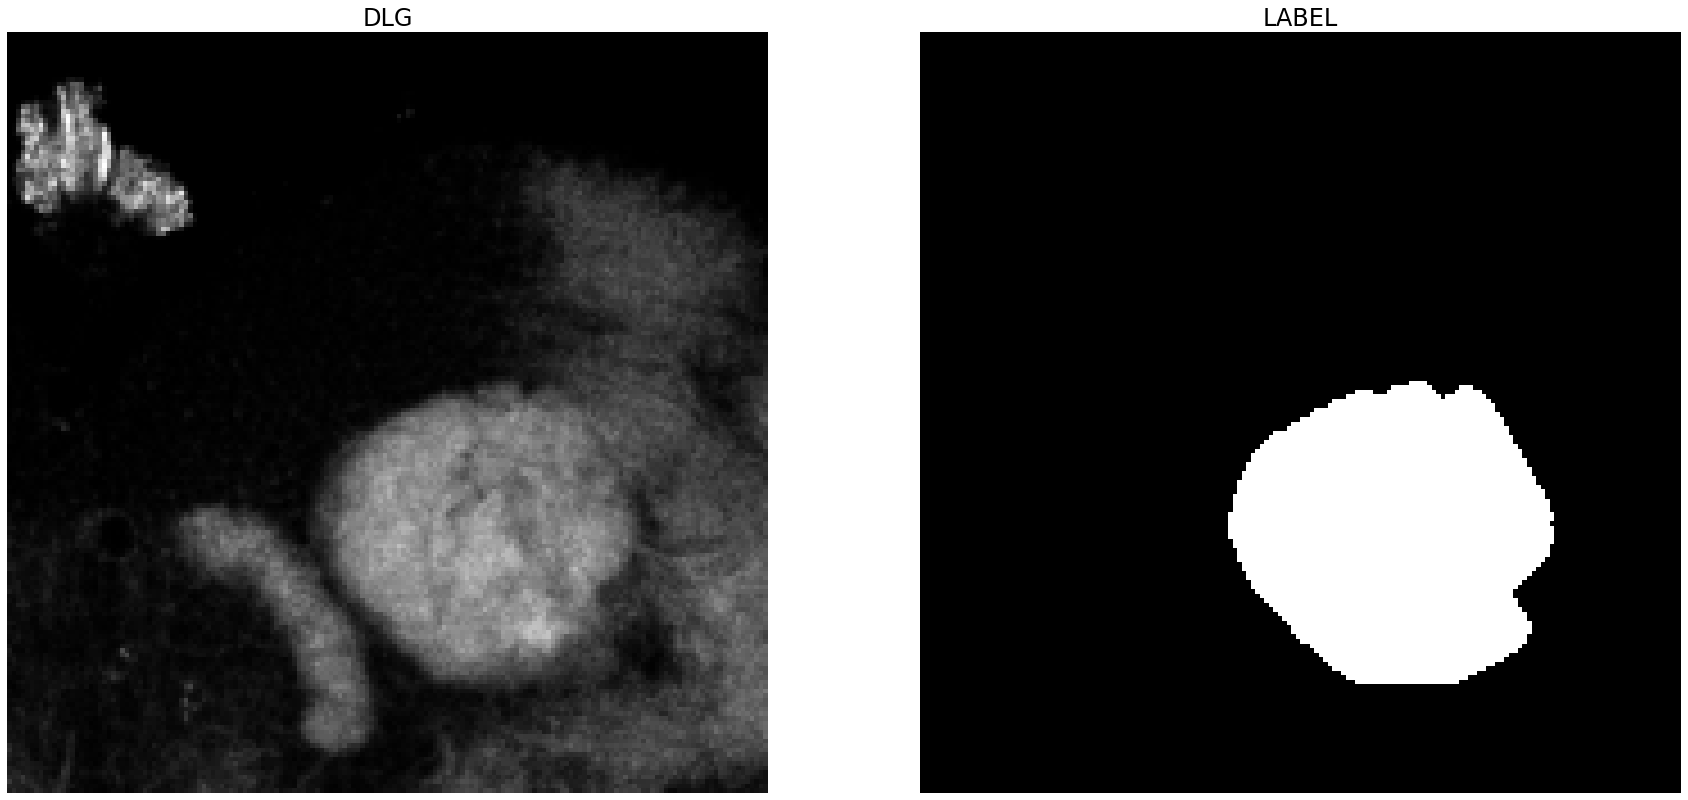

In [20]:
# ===========‰ª•‰∏äÂÆåÊàêDLG„ÄÅLABELÂàáÂâ≤ÔºåË™øÈñ±Ê™¢Êü•============
For_training_DLG = np.load('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_DLG.npy')
For_training_LABEL = np.load('2023_18_Brain_3DUNET_DataSet/'+target_name+'_No_1_LABEL.npy')
Z_num = 100
plt.figure(figsize=(30, 60))
#ÁõÆÊ®ôÁ•ûÁ∂ìÂÖÉ‰∏âË¶ñÂúñ
ax = plt.subplot(1, 2, 1)
plt.imshow(For_training_DLG[Z_num],cmap = 'PuBu')
ax.set_title("DLG",fontsize=24)
plt.axis('off')
plt.gray()
# ÈÄôË£°ZËª∏È†ÜÂ∫èÂíåÊ®ôÊ∫ñËÖ¶Áõ∏Âèç(ÊáâË©≤‰∏çÂΩ±Èüø)
ax = plt.subplot(1, 2, 2)
plt.imshow(For_training_LABEL[Z_num],cmap = 'PuBu')
ax.set_title("LABEL",fontsize=24)
plt.axis('off')
plt.gray()

In [21]:
# ========================Â∑≤Á∂ìËº∏Âá∫( 9x4 36)ÂÄãnpyÊ™îÊ°àËá≥ 2023_18_Brain_3DUNET_DataSet Ë≥áÊñôÂ§æ========================
# ========================Â∞á2ÂÄãÂ§ßËÖ¶ÂÅöÁÇ∫Ê∏¨Ë©¶ÈõÜÔºåÁßªÂãïÂà∞Êñ∞Ë≥áÊñôÂ§æÔºåÂÖ∂‰ªñ7ÂÄãÂ§ßËÖ¶ÂÅöÁÇ∫Ë®ìÁ∑¥ÈõÜ========================
# !!!!!!!!!!!!!!!!!!!!!!!!VGlut-F-800014 & Gad1-F-400041 Áï∂‰ΩúÊ∏¨Ë©¶ÈõÜÂêàÔºåÂÖ∂È§òË®ìÁ∑¥ÈõÜ!!!!!!!!!!!!!!!!!!!!!!!!
# ========================‰∏ã‰∏ÄÊ≠•: ËÆÄÂèñË®ìÁ∑¥ÈõÜÔºå‰∏¶ÁîüÊàêZËª∏ÈõôÂêëdata(‰∏ÄÂÖ±ÊúÉÁî¢Áîü56ÂÄã3DËÖ¶ÂçÄ)ÔºåÂ∞á56ÂÄã3DËÖ¶ÂçÄÂÄãÂà•ÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤ÔºåÊúÄÁµÇÂêà‰Ωµ========================

In [22]:
# Step6_0 ÂÖàÂ∞áÊ™îÊ°àÁßªÂãïÂà∞ 2023_2_Brain_3DUNET_For_Testing and 2023_16_Brain_3DUNET_For_Training
#ÁõÆÁöÑ: Â∞á VGlut-F-800014 & Gad1-F-400041 ÈñãÈ†≠ÁöÑË§áË£ΩÂà∞ 2023_2_Brain_3DUNET_For_Testing
#      Â∞áÂÖ∂È§òÁ∑®ËôüÈñãÈ†≠ÁöÑÊ™îÊ°àË§áË£ΩÂà∞ 2023_16_Brain_3DUNET_For_Training
# ËÆÄÂèñ 2023_18_Brain_3DUNET_DataSet Ë≥áÊñôÂ§æ‰∏≠ÁöÑÊ™îÊ°àÂêçÁ®±
Brain_18_npy_dir = '2023_18_Brain_3DUNET_DataSet/'
# ÂàóÂá∫ÊâÄÊúâYOLOÊé®ÁêÜËº∏Âá∫ÁöÑÂúñÁâáÔºåÂè™ÂàóÂá∫ÂâØÊ™îÂêçÁÇ∫pngÁöÑÂúñÁâá
Brain_18_npy = os.listdir(Brain_18_npy_dir)
!rm -r 2023_2_Brain_3DUNET_For_Testing
!mkdir 2023_2_Brain_3DUNET_For_Testing
!rm -r 2023_16_Brain_3DUNET_For_Training
!mkdir 2023_16_Brain_3DUNET_For_Training
# Ëø¥ÂúàÂà§Êñ∑ Brain_18_npy[i] string‰∏≠ÊòØÂê¶Êúâ'VGlut-F-800014' or 'Gad1-F-400041' Â≠ó‰∏≤
# Â¶ÇÊûúÊúâÂ∞á Brain_18_npy[i] Ë§áË£ΩÂà∞ 2023_2_Brain_3DUNET_For_Testing Ë≥áÊñôÂ§æÂÖßÔºåËã•Ê≤íÊúâÂâáË§áË£ΩÂà∞ 2023_16_Brain_3DUNET_For_Training
for i in range(len(Brain_18_npy)):
    if 'VGlut-F-800014' in Brain_18_npy[i] or 'Gad1-F-400041' in Brain_18_npy[i]:
        if 'original' not in Brain_18_npy[i]:
            
            shutil.copyfile(Brain_18_npy_dir + Brain_18_npy[i], '2023_2_Brain_3DUNET_For_Testing/' + Brain_18_npy[i])
    else:
        if 'original' not in Brain_18_npy[i]:
            
            shutil.copyfile(Brain_18_npy_dir + Brain_18_npy[i], '2023_16_Brain_3DUNET_For_Training/' + Brain_18_npy[i])

In [23]:
# Step6_1 ËÆÄÂèñË®ìÁ∑¥ÈõÜË≥áÊñôÂ§æ(ÁõÆÂâçÂè™Êúâ7ÂÄãÂ§ßËÖ¶ÂÖ±14ÂÄãDLG 14ÂÄãLABEL)
# Ë®ìÁ∑¥ÈõÜË≥áÊñôÂ§æ: 2023_16_Brain_3DUNET_For_Training
# ÁõÆÁöÑ:ÊâπÈáèËÆÄÂèñ Ë®ìÁ∑¥ÈõÜË≥áÊñôÂ§æÂÖßÁöÑDLG Âíå LABEL
# ËÆÄÂèñË®ìÁ∑¥ÈõÜË≥áÊñôÂ§æÂÖßÁöÑDLGÊ™îÊ°à
DLG_src_files = os.listdir('2023_16_Brain_3DUNET_For_Training')
DLG_src_files = [i for i in DLG_src_files if '_DLG.npy' in i]
print('Â∑≤Á∂ìÊúâLabelÁöÑÂ§ßËÖ¶Êï∏Èáè: ',len(DLG_src_files)/2)
# ËÆÄÂèñÊ∏¨Ë©¶ÈõÜË≥áÊñôÂ§æÂÖßÁöÑLABELÊ™îÊ°à
LABEL_src_files = os.listdir('2023_16_Brain_3DUNET_For_Training')
LABEL_src_files = [i for i in LABEL_src_files if '_LABEL.npy' in i]
# Â∞áÂÖ©ÂÄãÂàóË°®ÂæûÊñ∞ÊéíÂàó
DLG_src_files.sort()
LABEL_src_files.sort()
# ÂÖàËÆÄÂèñ DLG LABEL Ê™îÊ°àÂêçÁ®±

Â∑≤Á∂ìÊúâLabelÁöÑÂ§ßËÖ¶Êï∏Èáè:  15.5


In [24]:
DLG_src_files[0]

'5-HT1B-M-000008_No_1_DLG.npy'

In [25]:
LABEL_src_files[0]

'5-HT1B-M-000008_No_1_LABEL.npy'

# Step7 ÊâπÊ¨°ËÆÄÂèñÂñÆÂÄãnpyÊ™îÊ°àÔºåË®ìÁ∑¥ÈõÜÈúÄË¶ÅÈÄ≤Ë°åZËª∏ÈõôÂêëÂ¢ûÂº∑(ÊèêÈ´òË≥áÊñôÂ§öÊ®£ÊÄß)ÔºåÂÜçÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤ÔºåÂú®ÊåÅÁ∫åÊñ∞Â¢ûÁñäÂä†ÂÜç‰∏ÄËµ∑
Step_of_slide = 20 # ÊªëÂãïÊ≠•Êï∏
Size_of_cube = 128 # Èï∑ÂØ¨Â∞∫ÂØ∏
# ÂÖàËôïÁêÜ train_img (Ê≠£ÊñπÂêë)
for i in range(len(DLG_src_files)):
    # ÊâπÊ¨°ËÆÄÂèñnpyÊ™îÊ°àÔºåÂêåÊôÇÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤
    NPY_file = np.load('2023_16_Brain_3DUNET_For_Training/'+DLG_src_files[i])
    NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
    #print('NPY_file_patches: ',NPY_file_patches.shape)
    # Â∞áÊªëÂãïÂàáÂâ≤ÂæåÁöÑÂ§öÂÄãcubeÂêà‰Ωµ
    input_NPY_file_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
    #print('input_NPY_file_patches: ',input_NPY_file_patches.shape)
    # Âà™Èô§Âêà‰ΩµÂâçÁöÑcube 
    del NPY_file_patches
    gc.collect()  # ÂÖàËß∏ÁôºÂûÉÂúæÂõûÊî∂
    # Ëø¥ÂúàÁöÑÁ¨¨‰∏ÄÊ¨°ÂÖàÂ∞á input_NPY_file_patches Áõ¥Êé•Ë≥¶‰∫àÁµ¶ train_img ËÆäÊï∏
    if i ==0:
        train_img = input_NPY_file_patches
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
    else:
        train_img = np.append(train_img, input_NPY_file_patches, axis=0)
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
# ÂÖàËôïÁêÜ train_img (ÈÄÜÊñπÂêë)
for i in range(len(DLG_src_files)):
    # ÊâπÊ¨°ËÆÄÂèñnpyÊ™îÊ°àÔºåÂêåÊôÇÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤
    NPY_file = np.load('2023_16_Brain_3DUNET_For_Training/'+DLG_src_files[i])[::-1]# ===Ê≠§Ë°åÊòØÂ∞áÊ∏¨Ë©¶ËÖ¶ÁöÑZËª∏È†ÜÂ∫èÈ°õÂÄí
    NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
    #print('NPY_file_patches: ',NPY_file_patches.shape)
    # Â∞áÊªëÂãïÂàáÂâ≤ÂæåÁöÑÂ§öÂÄãcubeÂêà‰Ωµ
    input_NPY_file_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
    #print('input_NPY_file_patches: ',input_NPY_file_patches.shape)
    # Âà™Èô§Âêà‰ΩµÂâçÁöÑcube 
    del NPY_file_patches
    gc.collect()  # ÂÖàËß∏ÁôºÂûÉÂúæÂõûÊî∂
    
    # ÈÄÜÊñπÂêëËôïÁêÜÊôÇÂõ†ÁÇ∫Â∑≤Á∂ìÂ∑≤Á∂ìÂ≠òÂú® train_imgÔºåÊâÄ‰ª•ÂèØ‰ª•Áõ¥Êé•Êé•Á∫åÊñ∞Â¢û
    train_img = np.append(train_img, input_NPY_file_patches, axis=0)
    # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
    del input_NPY_file_patches
    gc.collect()
# ======================================================================================
        
# ËôïÁêÜ train_mask(Ê≠£ÊñπÂêë)
for i in range(len(LABEL_src_files)):
    # ÊâπÊ¨°ËÆÄÂèñnpyÊ™îÊ°àÔºåÂêåÊôÇÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤
    NPY_file = np.load('2023_16_Brain_3DUNET_For_Training/'+LABEL_src_files[i])
    NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
    #print('NPY_file_patches: ',NPY_file_patches.shape)
    # Â∞áÊªëÂãïÂàáÂâ≤ÂæåÁöÑÂ§öÂÄãcubeÂêà‰Ωµ
    input_NPY_file_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
    #print('input_NPY_file_patches: ',input_NPY_file_patches.shape)
    # Âà™Èô§Âêà‰ΩµÂâçÁöÑcube 
    del NPY_file_patches
    gc.collect()  # ÂÖàËß∏ÁôºÂûÉÂúæÂõûÊî∂
    # Ëø¥ÂúàÁöÑÁ¨¨‰∏ÄÊ¨°ÂÖàÂ∞á input_NPY_file_patches Áõ¥Êé•Ë≥¶‰∫àÁµ¶ train_img ËÆäÊï∏
    if i ==0:
        train_mask = input_NPY_file_patches
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
    else:
        train_mask = np.append(train_mask, input_NPY_file_patches, axis=0)
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
# ËôïÁêÜ train_mask (ÈÄÜÊñπÂêë)
for i in range(len(LABEL_src_files)):
    # ÊâπÊ¨°ËÆÄÂèñnpyÊ™îÊ°àÔºåÂêåÊôÇÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤
    NPY_file = np.load('2023_16_Brain_3DUNET_For_Training/'+LABEL_src_files[i])[::-1]# ===Ê≠§Ë°åÊòØÂ∞áÊ∏¨Ë©¶ËÖ¶ÁöÑZËª∏È†ÜÂ∫èÈ°õÂÄí
    NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
    #print('NPY_file_patches: ',NPY_file_patches.shape)
    # Â∞áÊªëÂãïÂàáÂâ≤ÂæåÁöÑÂ§öÂÄãcubeÂêà‰Ωµ
    input_NPY_file_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
    #print('input_NPY_file_patches: ',input_NPY_file_patches.shape)
    # Âà™Èô§Âêà‰ΩµÂâçÁöÑcube 
    del NPY_file_patches
    gc.collect()  # ÂÖàËß∏ÁôºÂûÉÂúæÂõûÊî∂
    
    # ÈÄÜÊñπÂêëËôïÁêÜÊôÇÂõ†ÁÇ∫Â∑≤Á∂ìÂ∑≤Á∂ìÂ≠òÂú® train_imgÔºåÊâÄ‰ª•ÂèØ‰ª•Áõ¥Êé•Êé•Á∫åÊñ∞Â¢û
    train_mask = np.append(train_mask, input_NPY_file_patches, axis=0)
    # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
    del input_NPY_file_patches
    gc.collect()
# ======================================================================================
# È†êÊúüDLG Âíå LABEL ÈÉΩÊúâÂêÑÊúâ14ÁµÑnpyÔºåÈÄ≤Ë°åZËª∏Êï∏ÊìöÂ¢ûÂº∑ÔºåÂÖ±ÊúâÂêÑ28ÁµÑ3DËÖ¶ÂçÄÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤ÔºåÁî¢ÁîüÂÖ±36x28ÂÄãcubes(1008) (1008, 64, 128, 128)

In [26]:
# ÂàùÂßãÂåñÂ≠òÂÇ®ÂàáÂâ≤ÂêéÊï∞ÊçÆÂùóÁöÑÂàóË°® ============GPT4ÂÑ™Âåñ
list_of_train_img_patches = []
list_of_train_mask_patches = []

Step_of_slide = 20  # ÊªëÂä®Á™óÂè£ÁöÑÊ≠•Èïø
Size_of_cube = 128  # ÂàáÂâ≤ÊàêÁöÑÂ∞èÁ´ãÊñπ‰ΩìÁöÑÂ∞∫ÂØ∏

# Â§ÑÁêÜ train_imgÔºàÊ≠£ÂêëÂíåÈÄÜÂêëÔºâ
for i, file_name in enumerate(DLG_src_files):
    for reverse_axis in [False, True]:  # Ê≠£ÂêëÂíåÈÄÜÂêë
        # ËØªÂèñ .npy Êñá‰ª∂
        NPY_file_path = f'2023_16_Brain_3DUNET_For_Training/{file_name}'
        NPY_file = np.load(NPY_file_path)

        # Â¶ÇÊûúÈúÄË¶ÅÈÄÜÂêëÔºåÂèçËΩ¨Êï∞ÊçÆ
        if reverse_axis:
            NPY_file = NPY_file[::-1]

        # ‰ΩøÁî® patchify ÂØπÊï∞ÊçÆËøõË°åÂàáÂâ≤
        NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
        
        # ÈáçÊñ∞ÊéíÂàóÊï∞ÊçÆÂùó‰ª•Êñπ‰æøÂ≠òÂÇ®
        reshaped_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
        
        # Ê∑ªÂä†Âà∞ÂàóË°®
        list_of_train_img_patches.append(reshaped_patches)

# ‰ΩøÁî® np.vstack ‰∏ÄÊ¨°ÊÄßÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆÂùó
train_img = np.vstack(list_of_train_img_patches)

# Â§ÑÁêÜ train_maskÔºàÊ≠£ÂêëÂíåÈÄÜÂêëÔºâ
for i, file_name in enumerate(LABEL_src_files):
    for reverse_axis in [False, True]:  # Ê≠£ÂêëÂíåÈÄÜÂêë
        # ËØªÂèñ .npy Êñá‰ª∂
        NPY_file_path = f'2023_16_Brain_3DUNET_For_Training/{file_name}'
        NPY_file = np.load(NPY_file_path)

        # Â¶ÇÊûúÈúÄË¶ÅÈÄÜÂêëÔºåÂèçËΩ¨Êï∞ÊçÆ
        if reverse_axis:
            NPY_file = NPY_file[::-1]

        # ‰ΩøÁî® patchify ÂØπÊï∞ÊçÆËøõË°åÂàáÂâ≤
        NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
        
        # ÈáçÊñ∞ÊéíÂàóÊï∞ÊçÆÂùó‰ª•Êñπ‰æøÂ≠òÂÇ®
        reshaped_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
        
        # Ê∑ªÂä†Âà∞ÂàóË°®
        list_of_train_mask_patches.append(reshaped_patches)

# ‰ΩøÁî® np.vstack ‰∏ÄÊ¨°ÊÄßÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆÂùó
train_mask = np.vstack(list_of_train_mask_patches)


In [27]:
#Step8 Ëº∏Âá∫ train_img & train_mask Êèê‰æõÁµ¶Ë®ìÁ∑¥Ê®°Âûã‰ª£Á¢º‰ΩøÁî®
# Ëº∏Âá∫Ëá≥Ë≥áÊñôÂ§æ: 2023_3DUNET_Model_INPUT  (ÈÄôÂÄãË≥áÊñôÂ§æÂÖßÁöÑÊ™îÊ°àÊòØ‰ΩúÁÇ∫3D UnetÊ®°ÂûãÁöÑËº∏ÂÖ•‰æÜÊ∫ê(‰∏çÂçÄÂàÜË®ìÁ∑¥ or Ê∏¨Ë©¶))
# ÂÖàÁßªÈô§ 2023_3DUNET_Model_INPUT Ë≥áÊñôÂ§æÔºåÂÜçÊñ∞Â¢û
!rm -r 2023_3DUNET_Model_INPUT
!mkdir 2023_3DUNET_Model_INPUT
# Ëº∏Âá∫ train_img & train_mask
np.save('2023_3DUNET_Model_INPUT/DLG_INPUT',train_img)
np.save('2023_3DUNET_Model_INPUT/LABEL_INPUT',train_mask)

In [28]:
# ===============‰ª•‰∏äÂÆåÊàêËº∏Âá∫Ë®ìÁ∑¥ÈõÜ(1008, 64, 128, 128)===============
# ===============‰∏ãÊñπÈñãÂßãËº∏Âá∫Ê∏¨Ë©¶ÈõÜ(144, 64, 128, 128)===============

In [29]:
# Step9 ËÆÄÂèñÊ∏¨Ë©¶ÈõÜË≥áÊñôÂ§æ(ÁõÆÂâçÂè™Êúâ2ÂÄãÂ§ßËÖ¶ÂÖ±4ÂÄãDLG 4ÂÄãLABEL)
# Ë®ìÁ∑¥ÈõÜË≥áÊñôÂ§æ: 2023_2_Brain_3DUNET_For_Testing
# ÁõÆÁöÑ:ÊâπÈáèËÆÄÂèñ Ë®ìÁ∑¥ÈõÜË≥áÊñôÂ§æÂÖßÁöÑDLG Âíå LABEL
# ËÆÄÂèñË®ìÁ∑¥ÈõÜË≥áÊñôÂ§æÂÖßÁöÑDLGÊ™îÊ°à
DLG_src_files = os.listdir('2023_2_Brain_3DUNET_For_Testing')
DLG_src_files = [i for i in DLG_src_files if '_DLG.npy' in i]
print('Â∑≤Á∂ìÊúâLabelÁöÑÂ§ßËÖ¶Êï∏Èáè: ',len(DLG_src_files)/2)
# ËÆÄÂèñÊ∏¨Ë©¶ÈõÜË≥áÊñôÂ§æÂÖßÁöÑLABELÊ™îÊ°à
LABEL_src_files = os.listdir('2023_2_Brain_3DUNET_For_Testing')
LABEL_src_files = [i for i in LABEL_src_files if '_LABEL.npy' in i]
# Â∞áÂÖ©ÂÄãÂàóË°®ÂæûÊñ∞ÊéíÂàó
DLG_src_files.sort()
LABEL_src_files.sort()
# ÂÖàËÆÄÂèñ DLG LABEL Ê™îÊ°àÂêçÁ®±

Â∑≤Á∂ìÊúâLabelÁöÑÂ§ßËÖ¶Êï∏Èáè:  2.0


In [30]:
DLG_src_files

['Gad1-F-400041_No_1_DLG.npy',
 'Gad1-F-400041_No_2_DLG.npy',
 'VGlut-F-800014_No_1_DLG.npy',
 'VGlut-F-800014_No_2_DLG.npy']

In [31]:
# Step10 ÊâπÊ¨°ËÆÄÂèñÂñÆÂÄãnpyÊ™îÊ°àÔºåÊ∏¨Ë©¶ÈõÜ[‰∏ç]ÈúÄË¶ÅÈÄ≤Ë°åZËª∏ÈõôÂêëÂ¢ûÂº∑(ÊèêÈ´òË≥áÊñôÂ§öÊ®£ÊÄß)ÔºåÂÜçÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤ÔºåÂú®ÊåÅÁ∫åÊñ∞Â¢ûÁñäÂä†ÂÜç‰∏ÄËµ∑
Step_of_slide = 20 # ÊªëÂãïÊ≠•Êï∏
Size_of_cube = 128 # Èï∑ÂØ¨Â∞∫ÂØ∏
# ÂÖàËôïÁêÜ test_img (Ê≠£ÊñπÂêë)
for i in range(len(DLG_src_files)):
    # ÊâπÊ¨°ËÆÄÂèñnpyÊ™îÊ°àÔºåÂêåÊôÇÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤
    NPY_file = np.load('2023_2_Brain_3DUNET_For_Testing/'+DLG_src_files[i])
    NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
    #print('NPY_file_patches: ',NPY_file_patches.shape)
    # Â∞áÊªëÂãïÂàáÂâ≤ÂæåÁöÑÂ§öÂÄãcubeÂêà‰Ωµ
    input_NPY_file_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
    #print('input_NPY_file_patches: ',input_NPY_file_patches.shape)
    # Âà™Èô§Âêà‰ΩµÂâçÁöÑcube 
    del NPY_file_patches
    gc.collect()  # ÂÖàËß∏ÁôºÂûÉÂúæÂõûÊî∂
    # Ëø¥ÂúàÁöÑÁ¨¨‰∏ÄÊ¨°ÂÖàÂ∞á input_NPY_file_patches Áõ¥Êé•Ë≥¶‰∫àÁµ¶ test_img ËÆäÊï∏
    if i ==0:
        test_img = input_NPY_file_patches
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
    else:
        test_img = np.append(test_img, input_NPY_file_patches, axis=0)
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
# ======================================================================================
        
# ËôïÁêÜ test_mask(Ê≠£ÊñπÂêë)
for i in range(len(LABEL_src_files)):
    # ÊâπÊ¨°ËÆÄÂèñnpyÊ™îÊ°àÔºåÂêåÊôÇÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤
    NPY_file = np.load('2023_2_Brain_3DUNET_For_Testing/'+LABEL_src_files[i])
    NPY_file_patches = patchify(NPY_file, (64, Size_of_cube, Size_of_cube), step=Step_of_slide)
    #print('NPY_file_patches: ',NPY_file_patches.shape)
    # Â∞áÊªëÂãïÂàáÂâ≤ÂæåÁöÑÂ§öÂÄãcubeÂêà‰Ωµ
    input_NPY_file_patches = np.reshape(NPY_file_patches, (-1, NPY_file_patches.shape[3], NPY_file_patches.shape[4], NPY_file_patches.shape[5]))
    #print('input_NPY_file_patches: ',input_NPY_file_patches.shape)
    # Âà™Èô§Âêà‰ΩµÂâçÁöÑcube 
    del NPY_file_patches
    gc.collect()  # ÂÖàËß∏ÁôºÂûÉÂúæÂõûÊî∂
    # Ëø¥ÂúàÁöÑÁ¨¨‰∏ÄÊ¨°ÂÖàÂ∞á input_NPY_file_patches Áõ¥Êé•Ë≥¶‰∫àÁµ¶ test_mask ËÆäÊï∏
    if i ==0:
        test_mask = input_NPY_file_patches
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
    else:
        test_mask = np.append(test_mask, input_NPY_file_patches, axis=0)
        # Âà™Èô§ input_NPY_file_patches ËÆäÊï∏
        del input_NPY_file_patches
        gc.collect()
# ======================================================================================
# È†êÊúüDLG Âíå LABEL ÈÉΩÊúâÂêÑÊúâ4ÁµÑnpyÔºåÂÖ±ÊúâÂêÑ4ÁµÑ3DËÖ¶ÂçÄÈÄ≤Ë°åÊªëÂãïÂàáÂâ≤ÔºåÁî¢ÁîüÂÖ±36x4ÂÄãcubes(144) (144, 64, 128, 128)

In [32]:
#Step11 Ëº∏Âá∫ test_img & test_mask Êèê‰æõÁµ¶Ë®ìÁ∑¥Ê®°Âûã‰ª£Á¢º‰ΩøÁî®
# Ëº∏Âá∫Ëá≥Ë≥áÊñôÂ§æ: 2023_3DUNET_Model_INPUT_ONLY_TEST  (ÈÄôÂÄãË≥áÊñôÂ§æÂÖßÁöÑÊ™îÊ°àÊòØ‰ΩúÁÇ∫3D UnetÊ®°ÂûãÁöÑËº∏ÂÖ•‰æÜÊ∫ê(‰∏çÂçÄÂàÜË®ìÁ∑¥ or Ê∏¨Ë©¶))
# ÂÖàÁßªÈô§ 2023_3DUNET_Model_INPUT_ONLY_TEST Ë≥áÊñôÂ§æÔºåÂÜçÊñ∞Â¢û
!rm -r 2023_3DUNET_Model_INPUT_ONLY_TEST
!mkdir 2023_3DUNET_Model_INPUT_ONLY_TEST
# Ëº∏Âá∫ train_img & train_mask
np.save('2023_3DUNET_Model_INPUT_ONLY_TEST/DLG_INPUT',test_img)
np.save('2023_3DUNET_Model_INPUT_ONLY_TEST/LABEL_INPUT',test_mask)

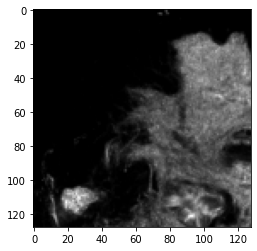

In [33]:
plt.imshow(test_img[10,0,:,:])

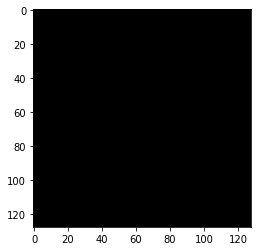

In [34]:
plt.imshow(test_mask[10,30,:,:])